In [1]:
import torch
from utils import DataLoader, evaluate_model
from models import FFNNModel
from matplotlib import pyplot as plt

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
dl = DataLoader(
    benchmark="benchmark_1",
    split=None,
    embedding="bert_cls", 
    max_len=128,
    include_axes=True,
    shuffle_axes=False,  
    normalization="zscore"
)

INFO:utils.dataloader:Initializing DataLoader...
INFO:utils.dataloader:Using device: cuda
INFO:utils.dataloader:Loading dataset for benchmark benchmark_1 with split None
INFO:utils.dataloader:No split specified; loading all splits (train, validation, test).
INFO:utils.dataloader:Dataset loaded successfully.
INFO:utils.dataloader:Initializing embedding for method bert_cls...
INFO:utils.dataloader:Initialized BERT model and tokenizer.
INFO:utils.dataloader:Embedding resources initialized.


In [4]:
data = dl.preprocess()
X_train, y_train = data["train"]
X_valid, y_valid = data["validation"]
X_test, y_test = data["test"]

INFO:utils.dataloader:Starting preprocessing of dataset(s)...
INFO:utils.dataloader:Processing split: train with 878 samples (shuffle_axes=False)...
INFO:utils.dataloader:Processing a single dataset split...
INFO:utils.dataloader:Combined feature vector shape: torch.Size([878, 6912])
INFO:utils.dataloader:Extracting and normalizing target values...
INFO:utils.dataloader:Converting target values to logarithmic scale...
INFO:utils.dataloader:No conversion needed; log_scale is already 1.1.
INFO:utils.dataloader:Normalizing target values...
INFO:utils.dataloader:Z-score parameters: mean=[ 5.44271868e+01  1.15348462e+01 -2.48804100e-02], std=[20.1219028   3.81394874  1.39502752]
INFO:utils.dataloader:Processing split: validation with 247 samples (shuffle_axes=False)...
INFO:utils.dataloader:Processing a single dataset split...
INFO:utils.dataloader:Combined feature vector shape: torch.Size([247, 6912])
INFO:utils.dataloader:Extracting and normalizing target values...
INFO:utils.dataloader:C

In [5]:
input_dim = X_train.shape[1]
save_path = "baseline_weights/benchmark_1/ffnn.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [6]:
grid_params = {
    "hidden_dim": [64, 128, 256],
    "dropout": [0.0, 0.2, 0.5],
    "weight_decay": [0.0, 0.001, 0.01],
    "lr": [0.01, 0.001, 0.0001],
    "l1": [0.0, 0.0001, 0.001]
}
epochs = 100

INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8755


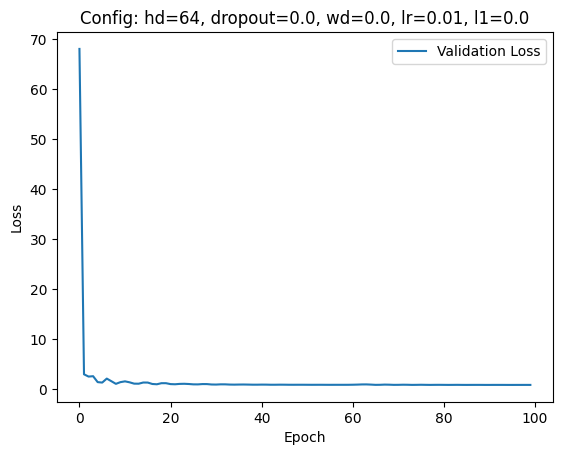

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8680


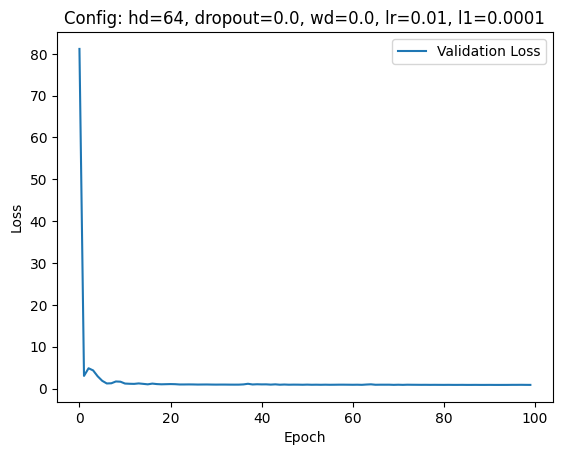

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9984


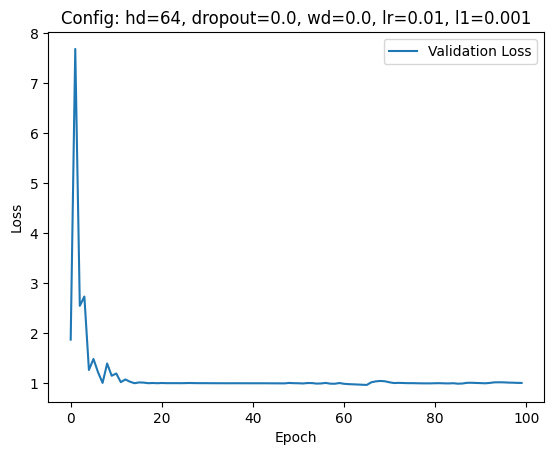

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9512


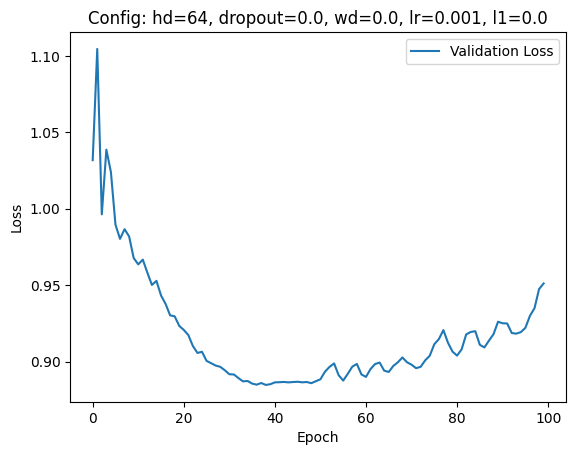

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9019


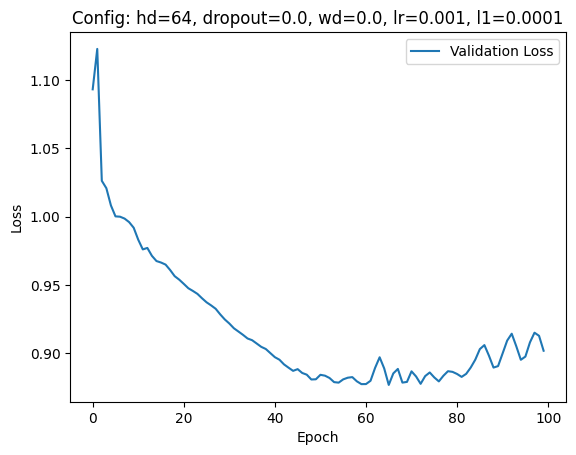

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8677


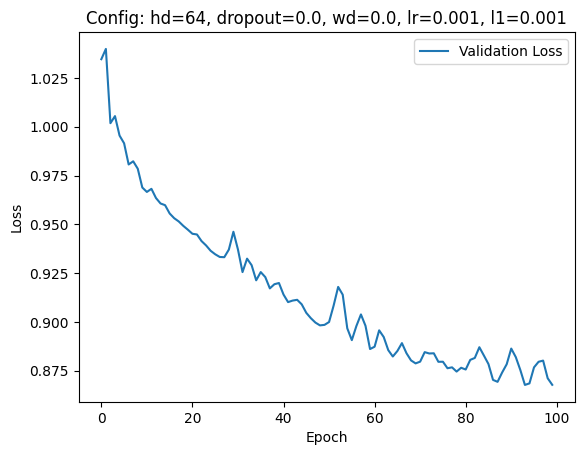

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8812


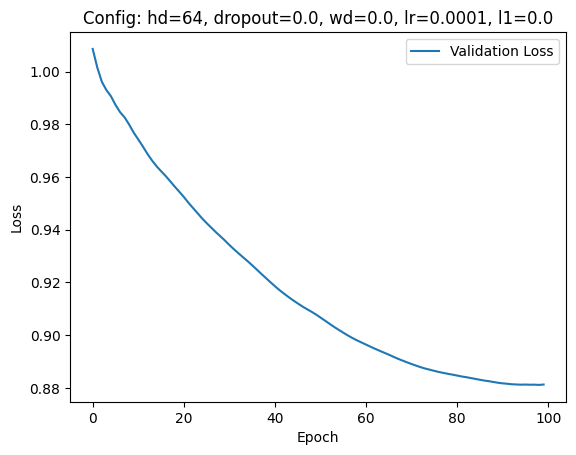

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8802


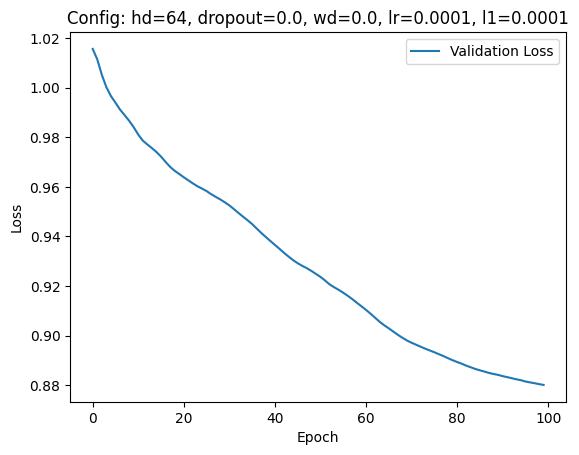

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9035


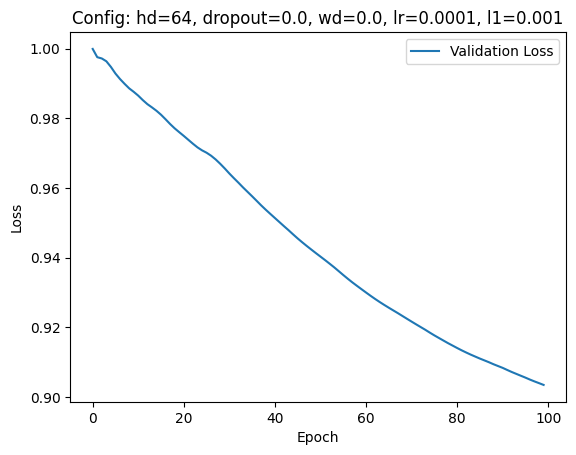

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8760


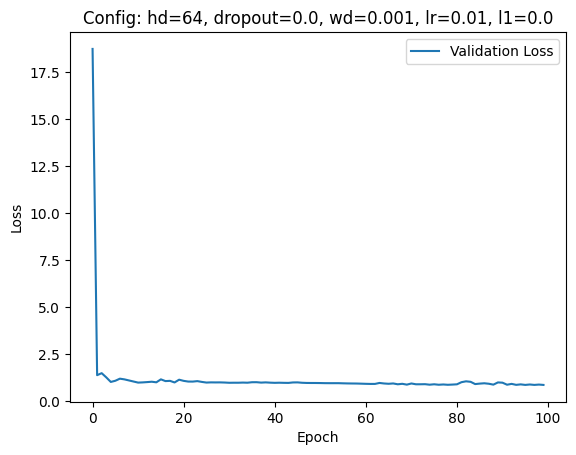

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8951


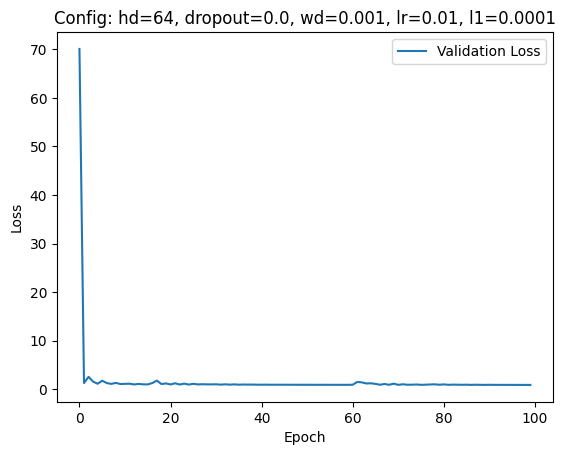

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9102


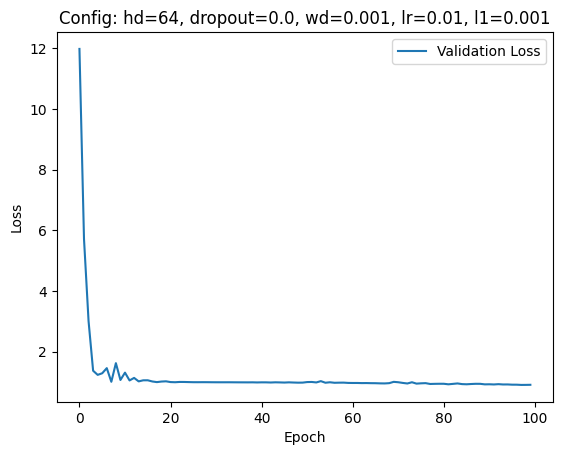

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9263


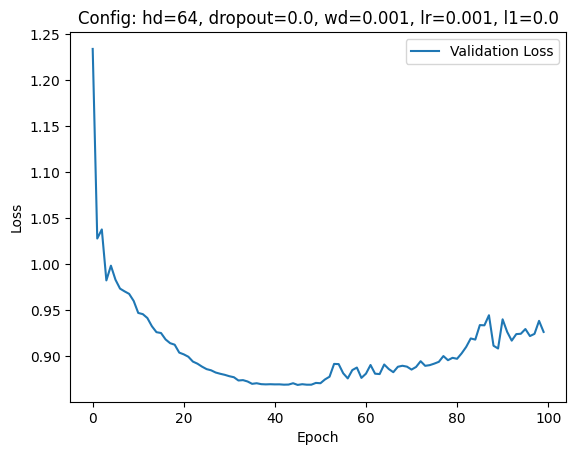

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8999


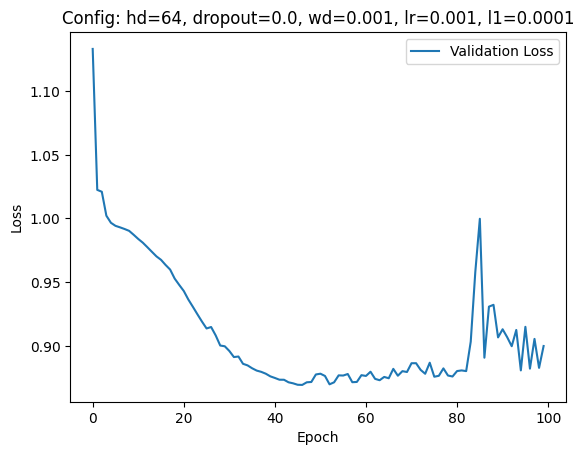

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8785


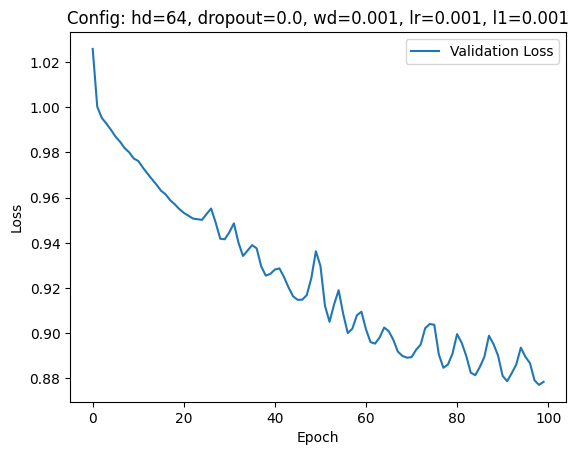

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8746


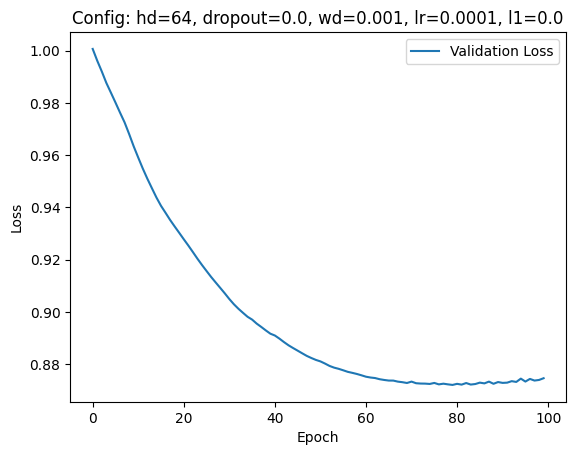

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8848


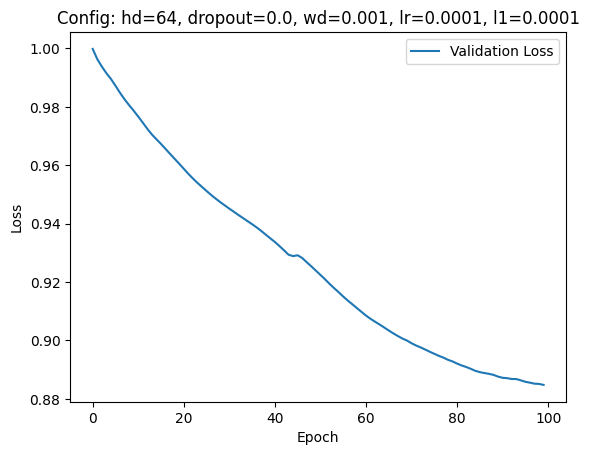

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9229


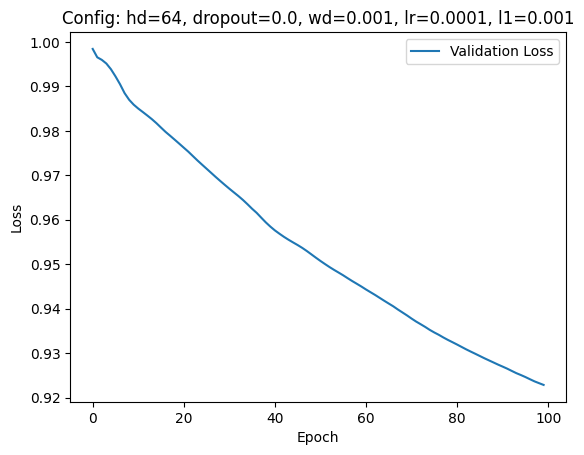

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9533


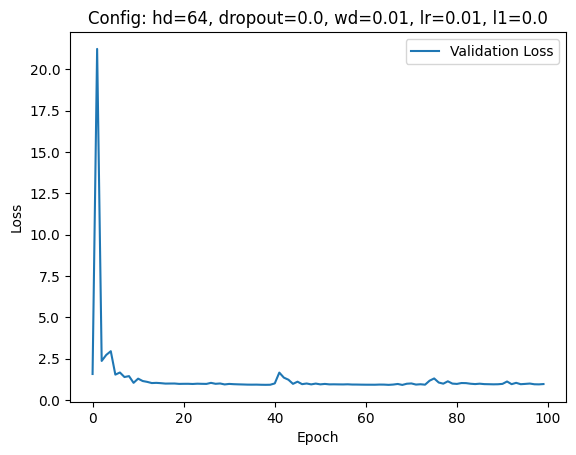

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9113


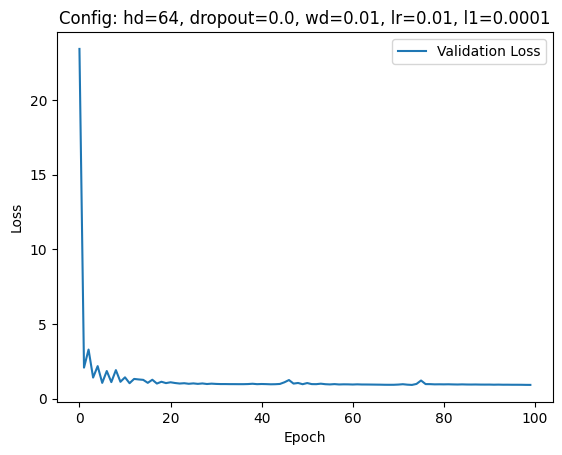

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9746


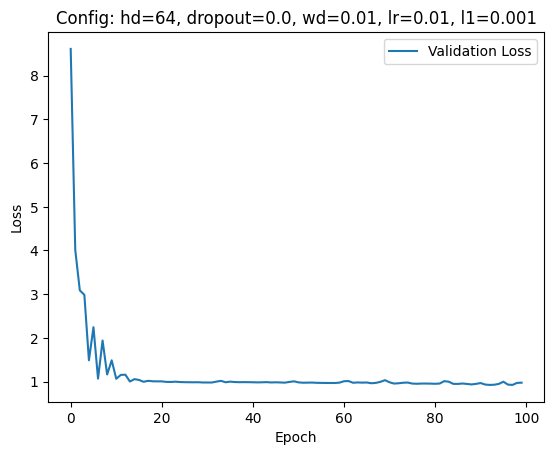

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8910


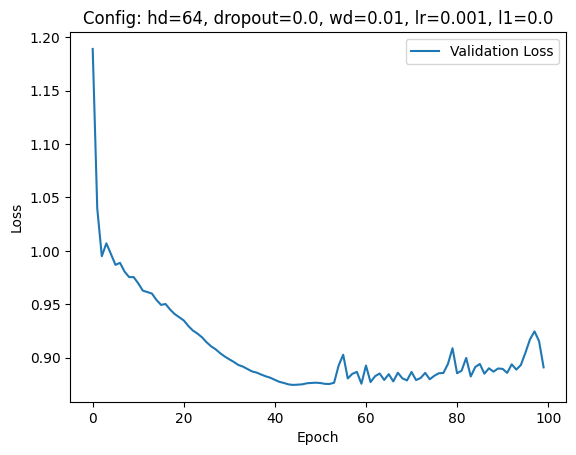

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8882


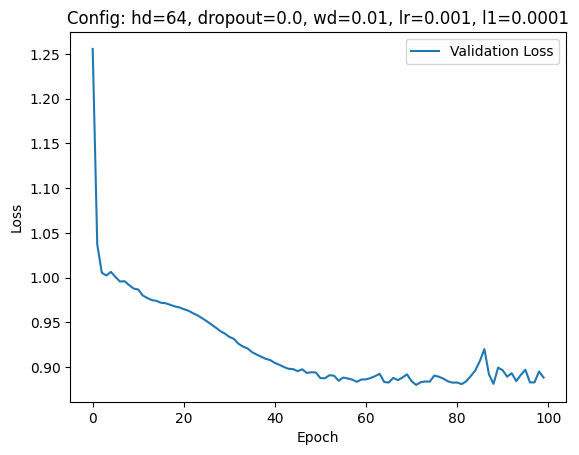

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8728


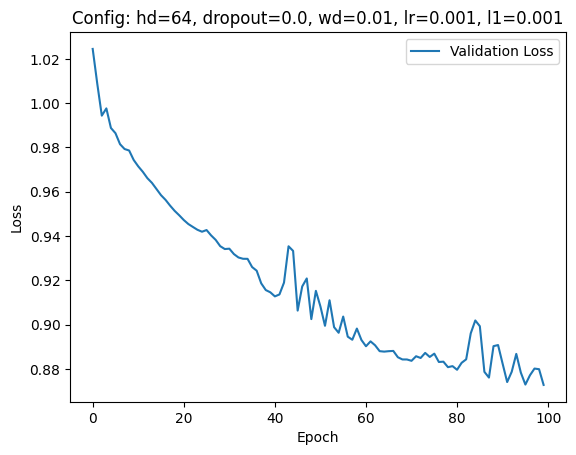

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8864


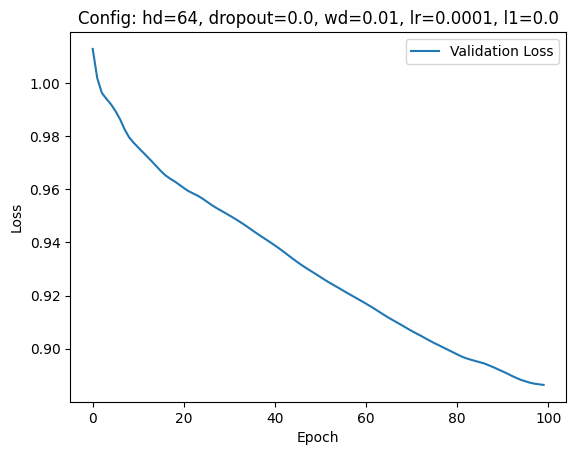

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8733


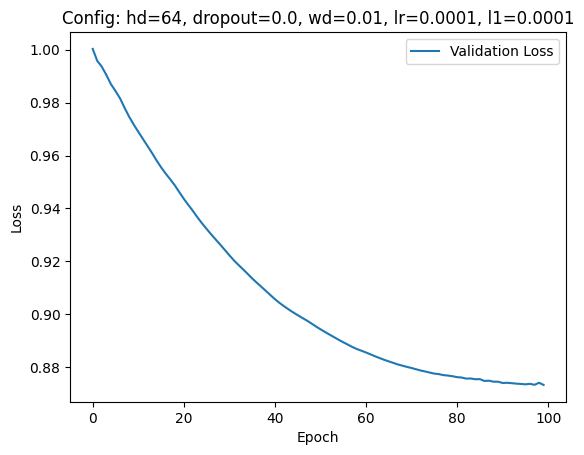

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9244


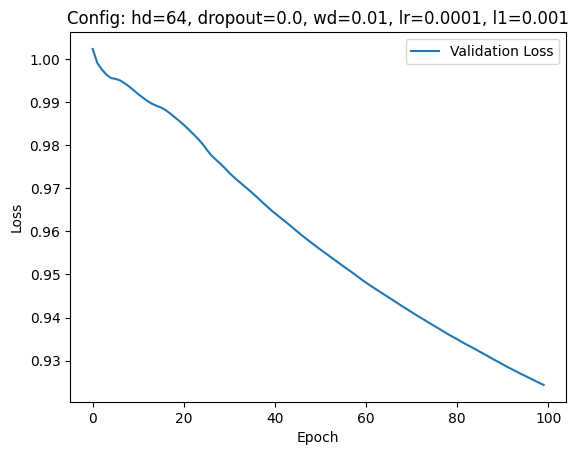

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0006


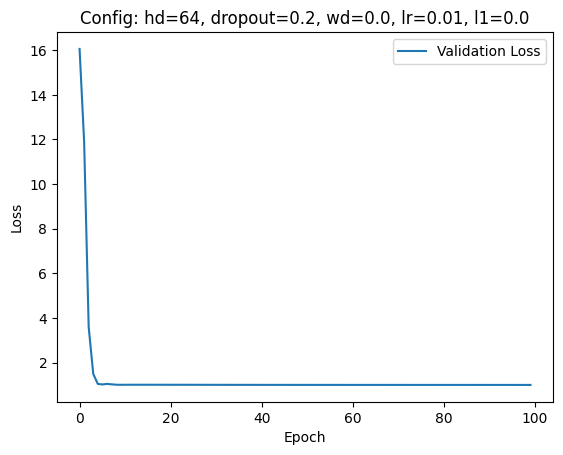

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0001


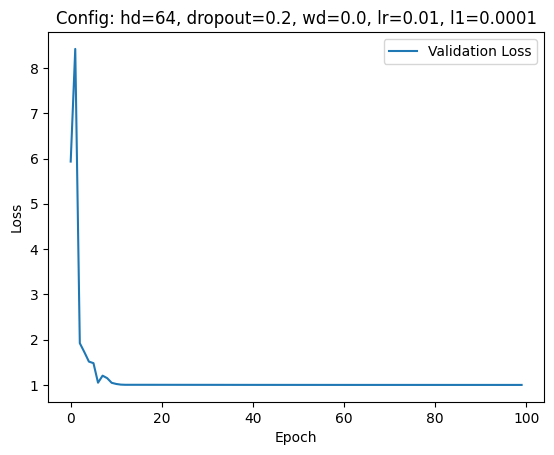

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9908


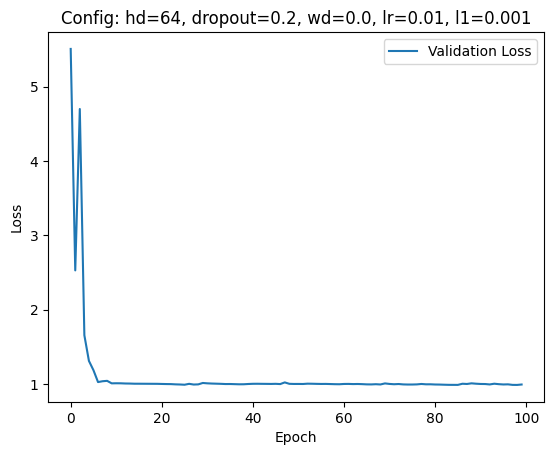

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8790


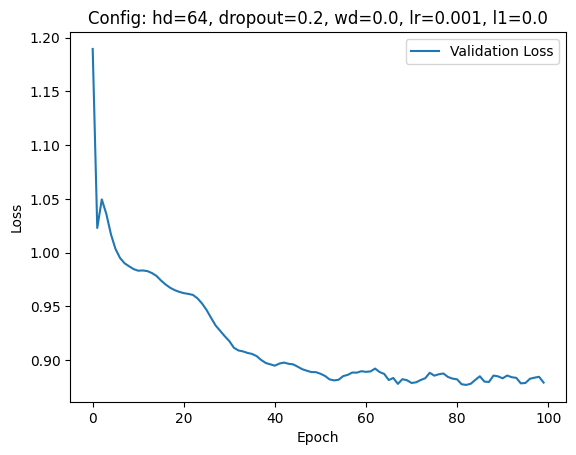

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8941


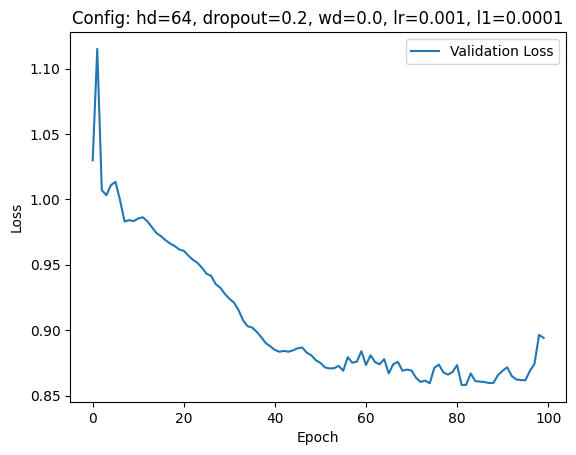

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8941


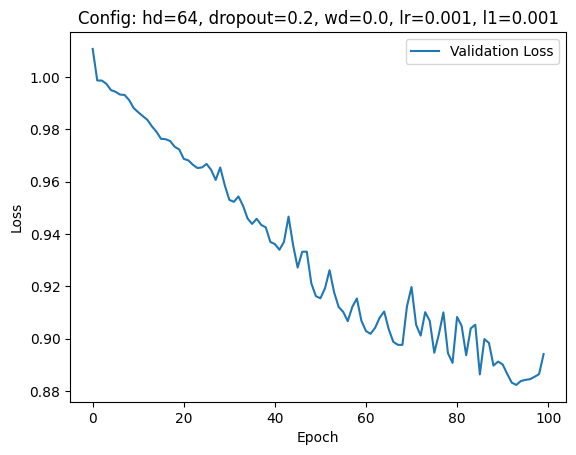

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8962


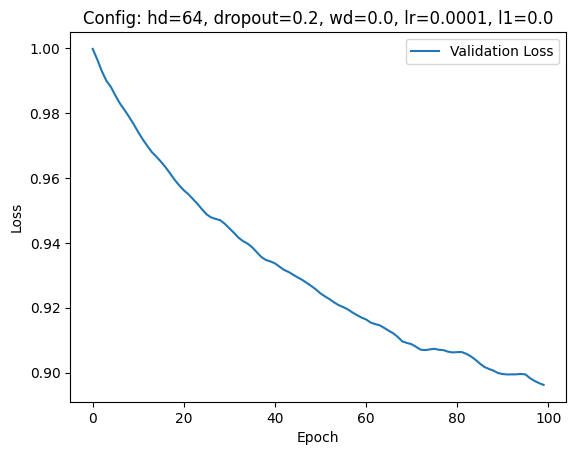

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8921


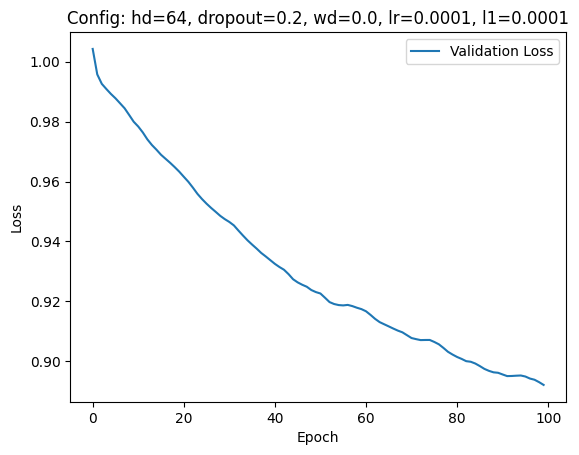

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9434


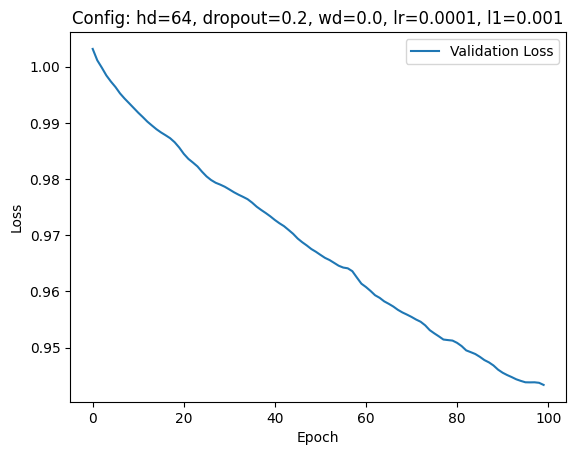

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9727


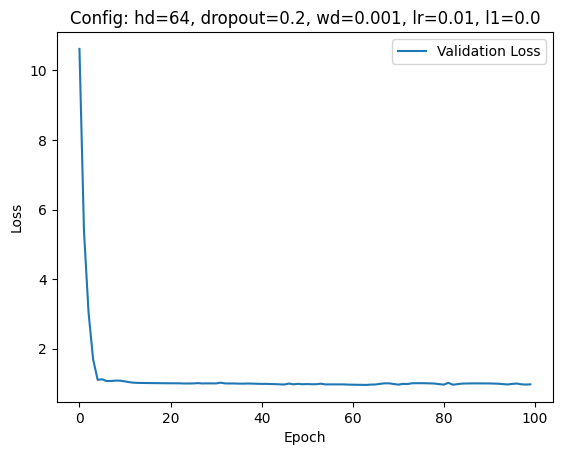

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0009


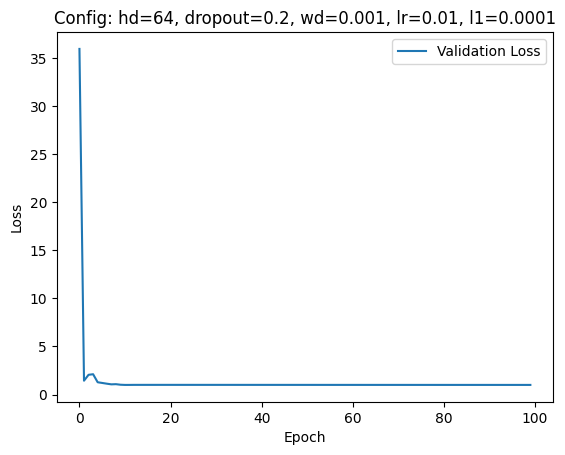

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9963


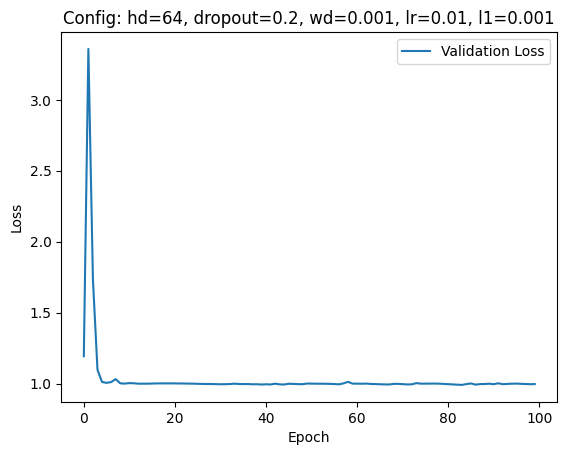

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9412


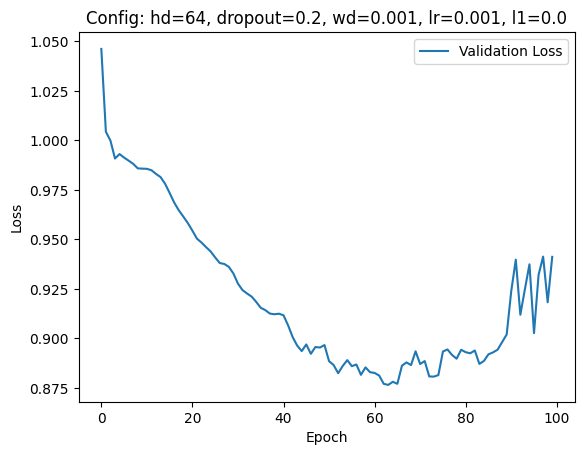

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8874


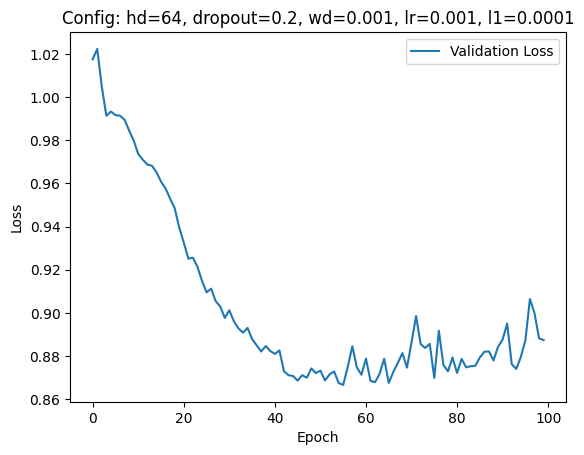

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9249


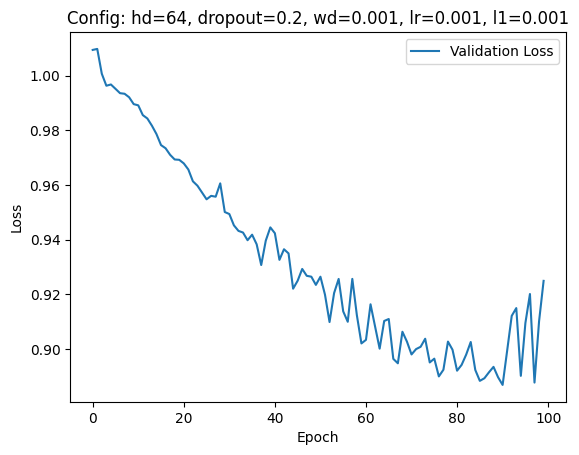

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8914


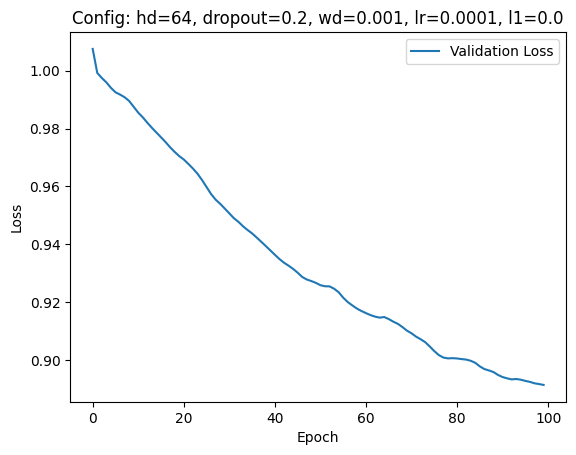

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8788


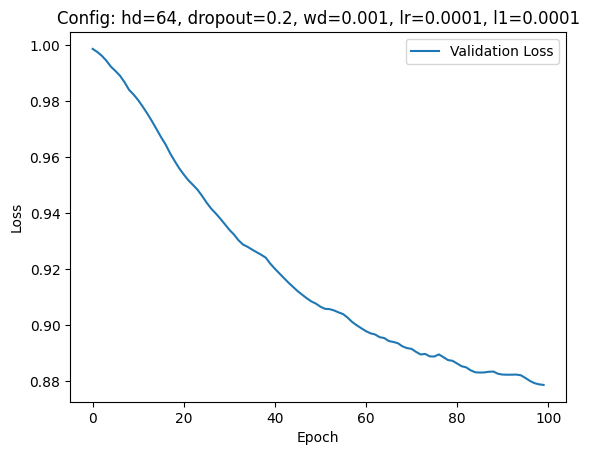

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9375


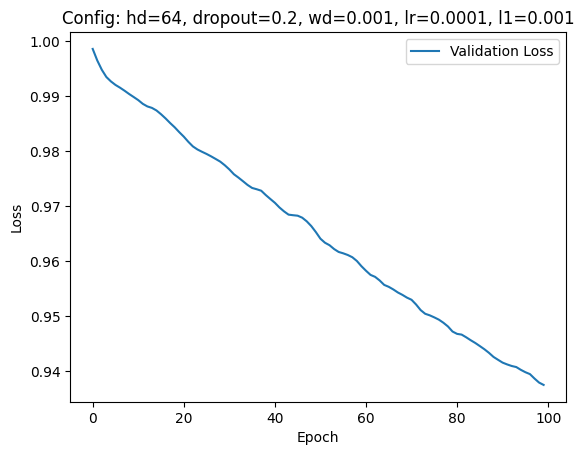

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0012


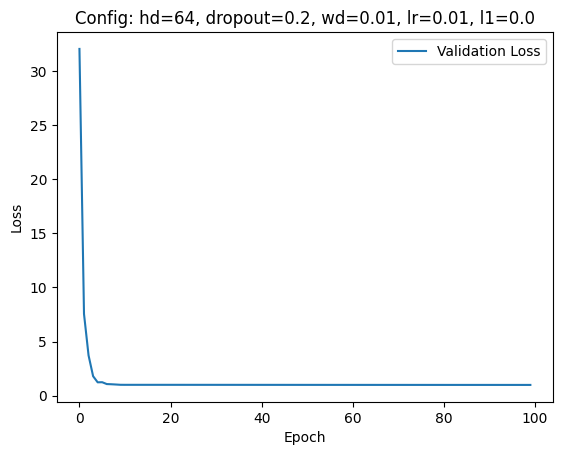

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0024


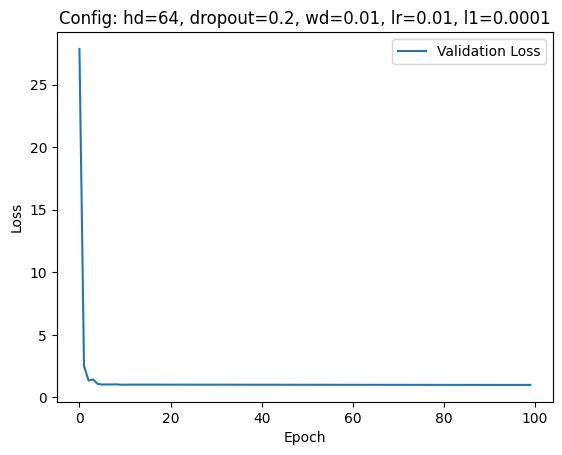

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9965


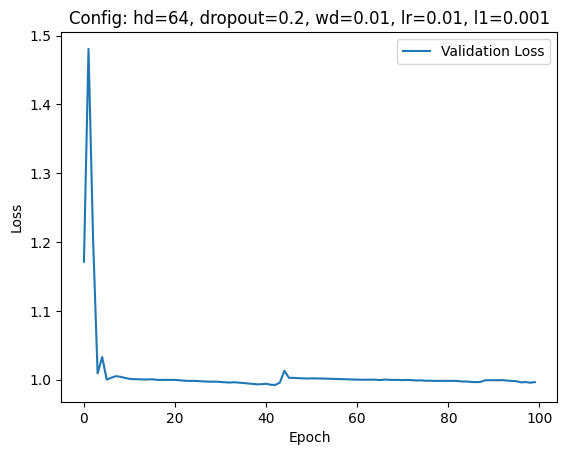

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8946


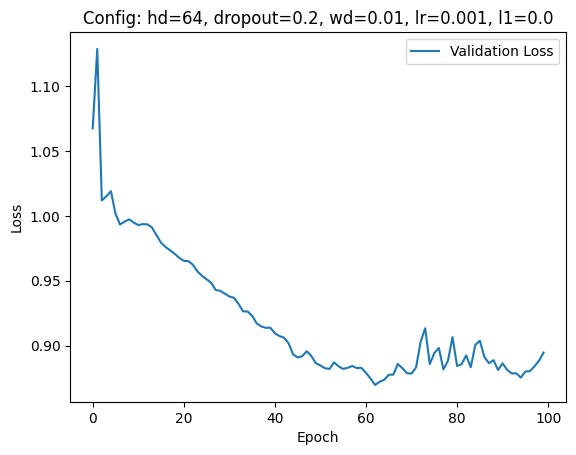

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8783


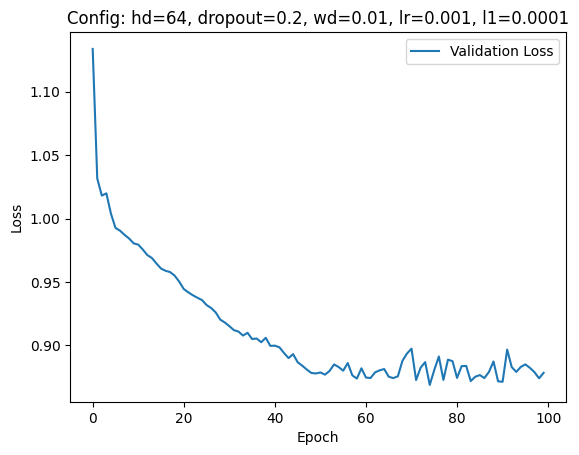

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8958


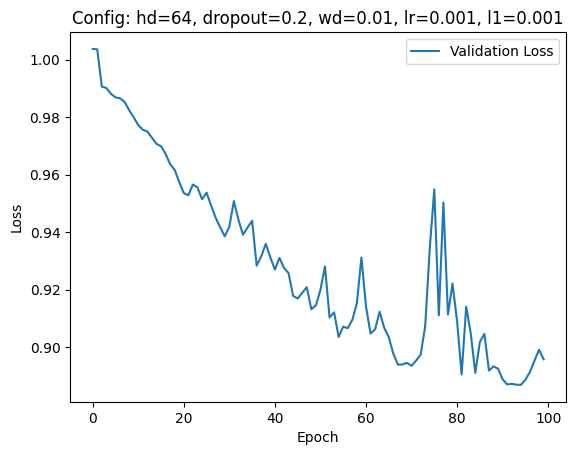

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8903


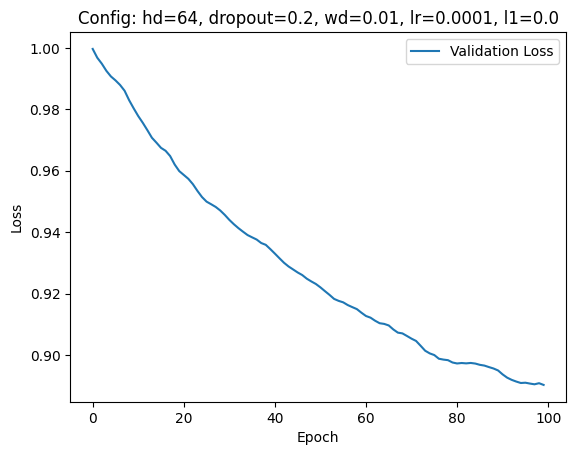

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8966


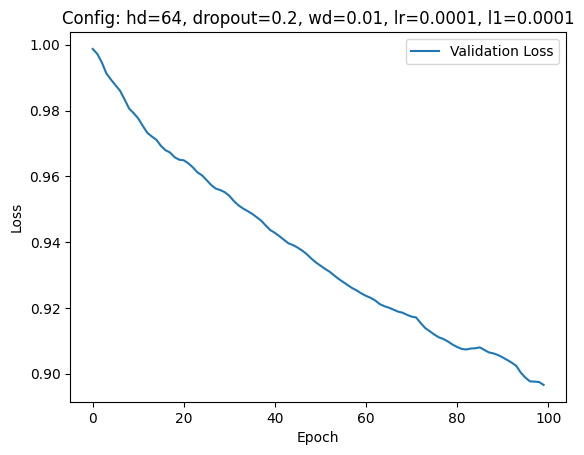

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9512


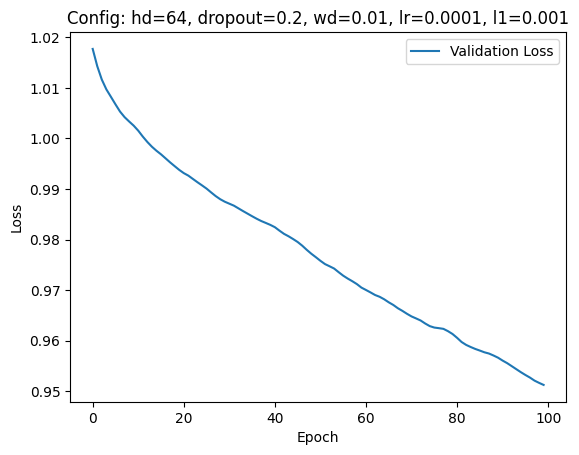

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0001


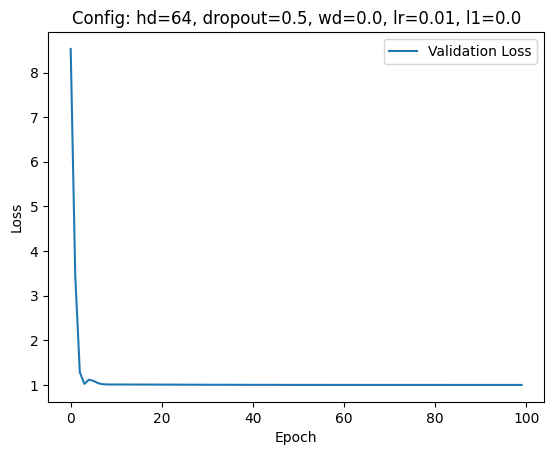

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9974


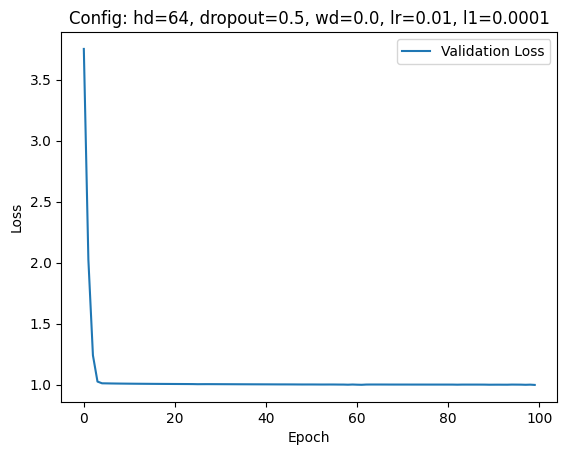

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9994


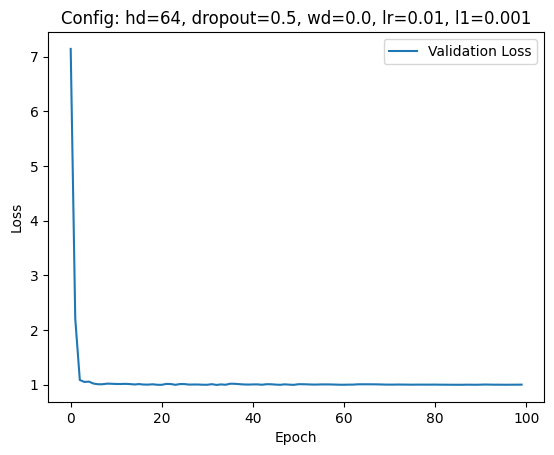

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8776


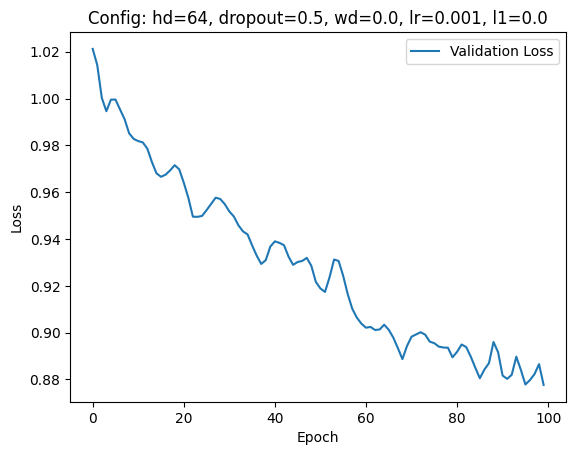

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8969


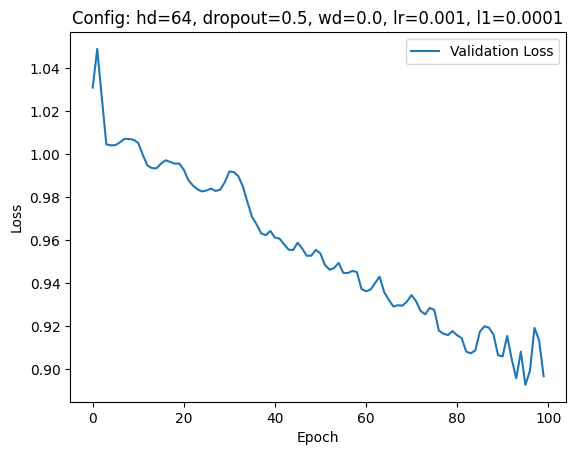

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9398


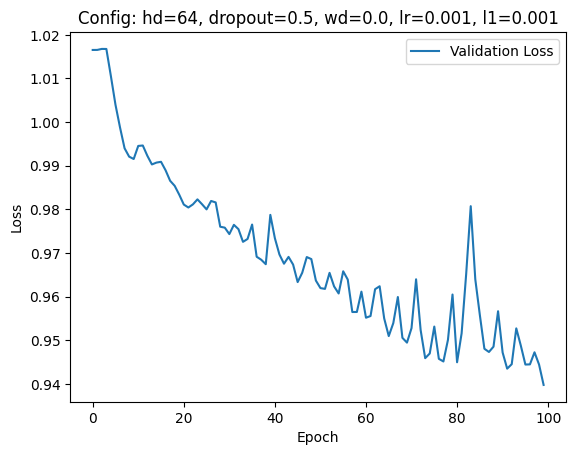

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9254


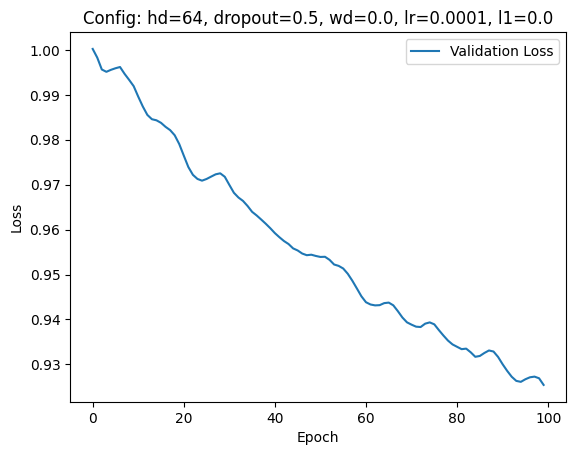

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9402


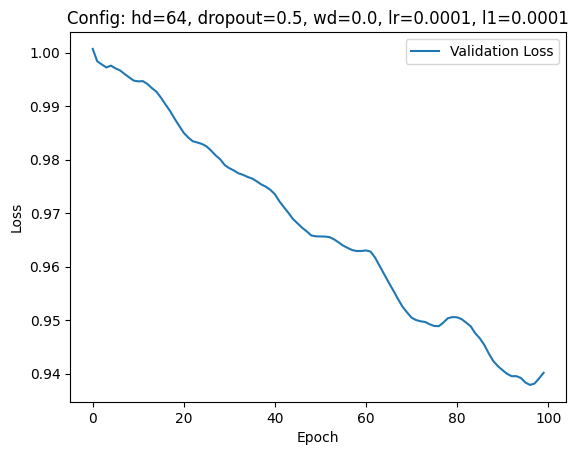

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9652


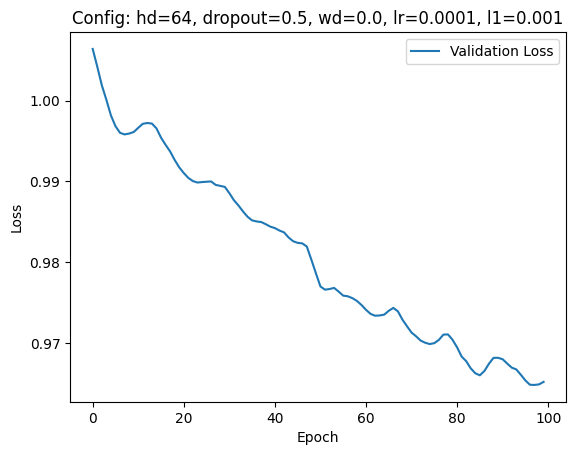

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0012


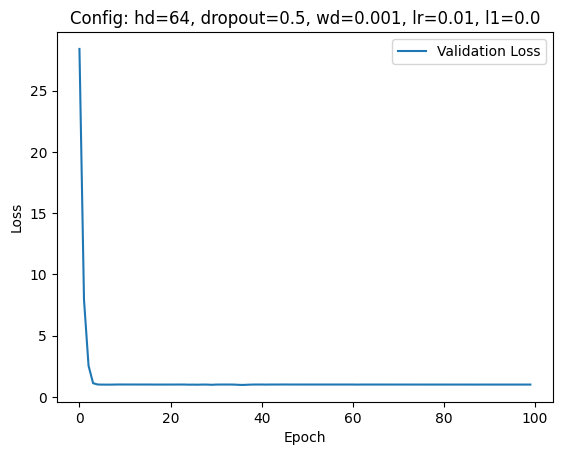

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0009


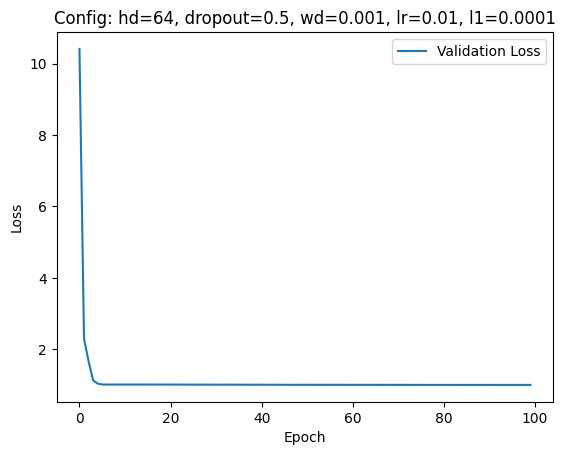

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0000


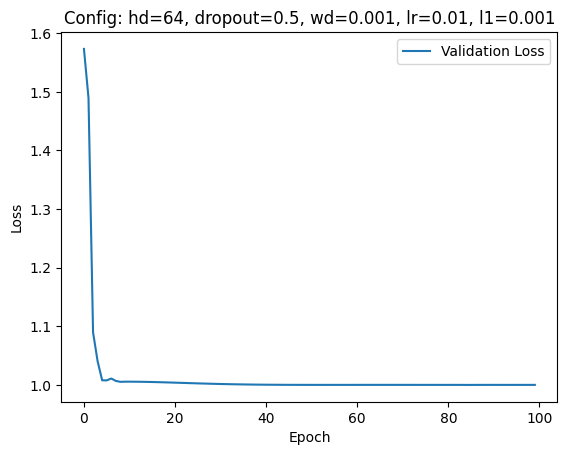

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9042


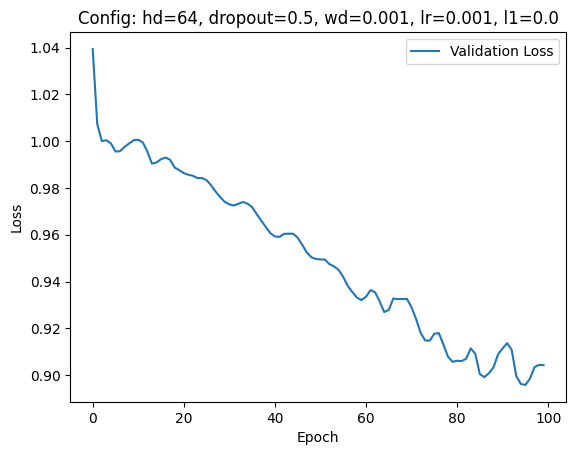

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8966


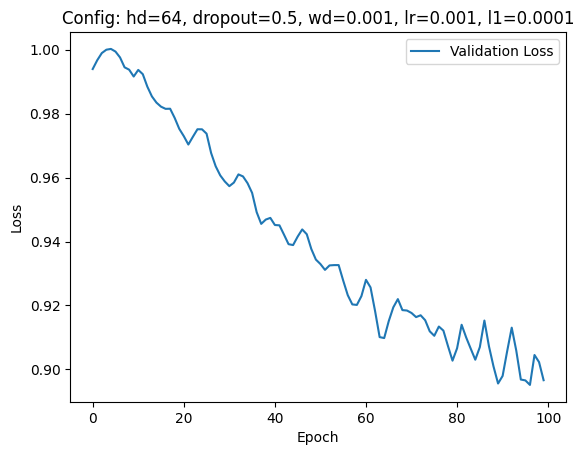

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9506


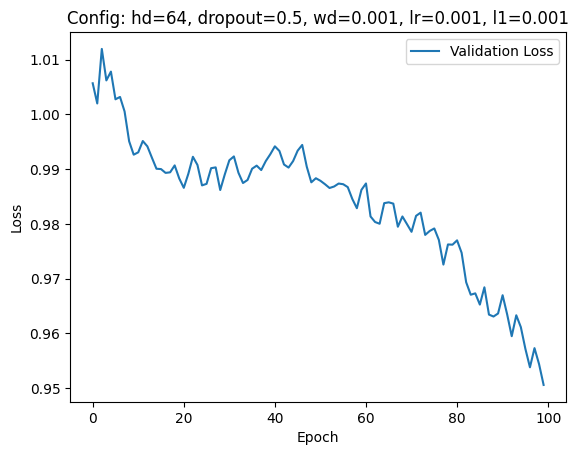

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9251


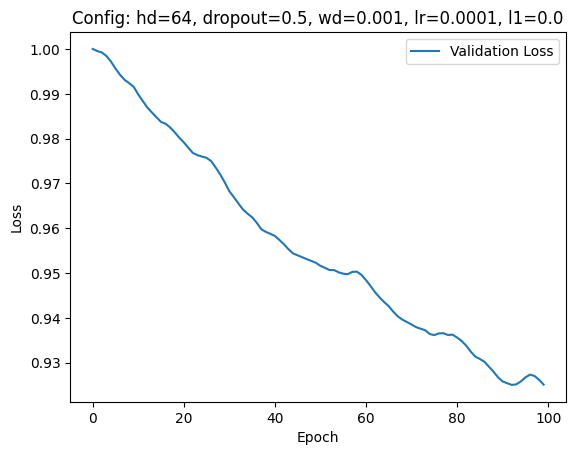

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9298


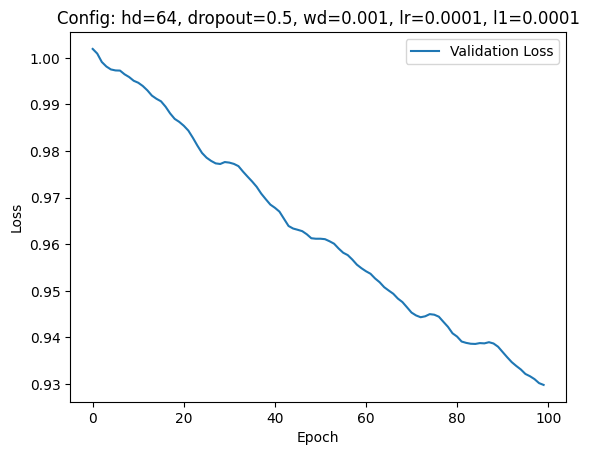

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9592


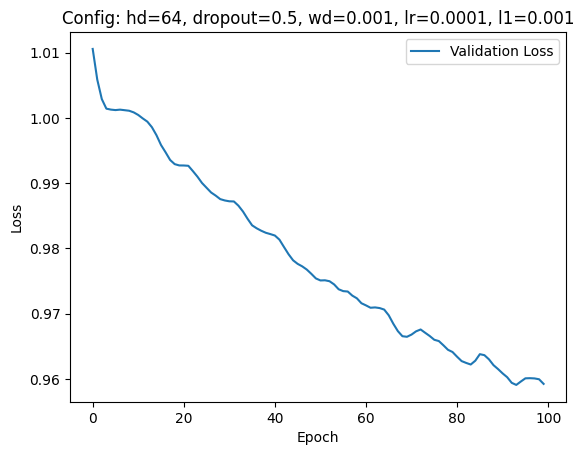

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0017


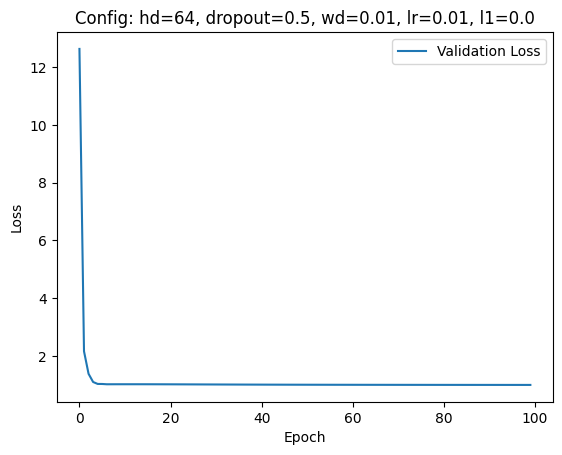

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0004


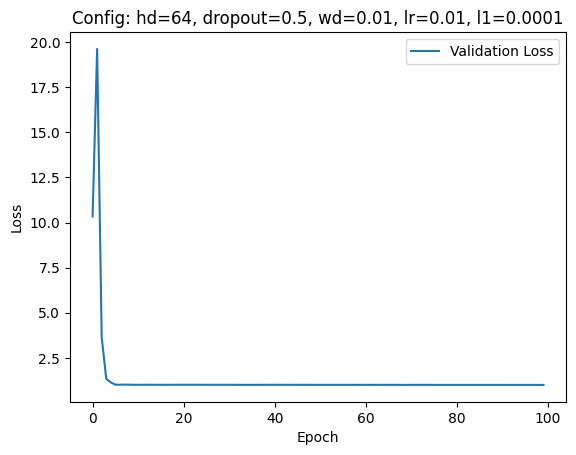

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0000


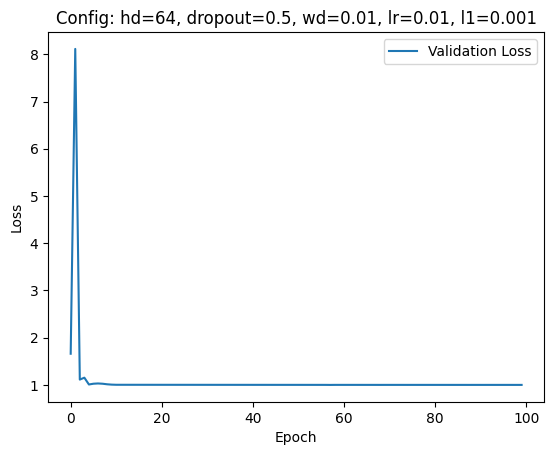

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9294


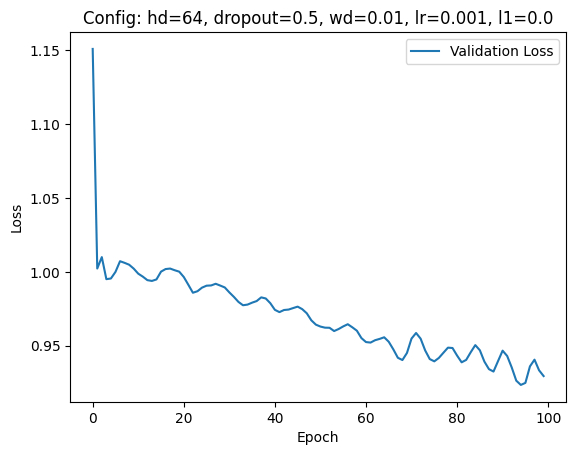

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9111


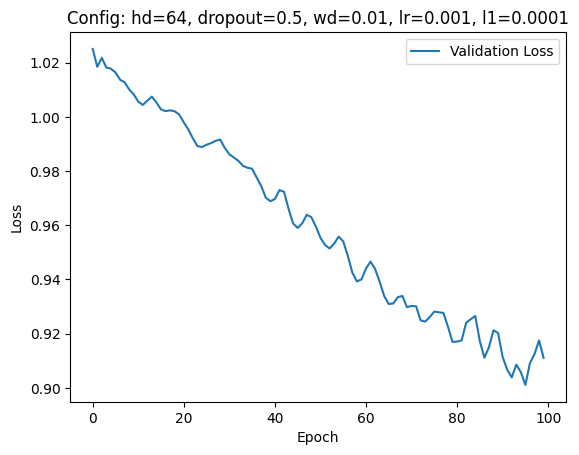

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9355


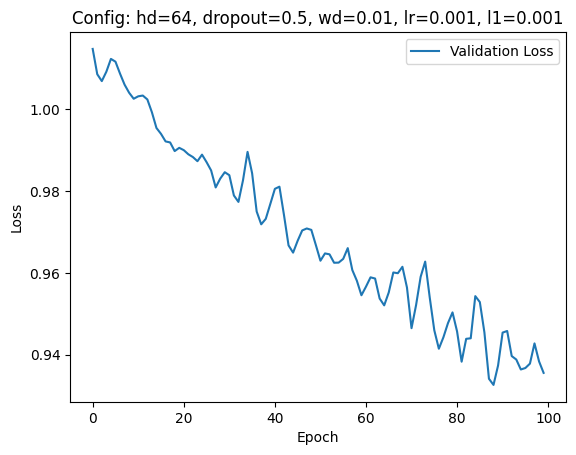

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9221


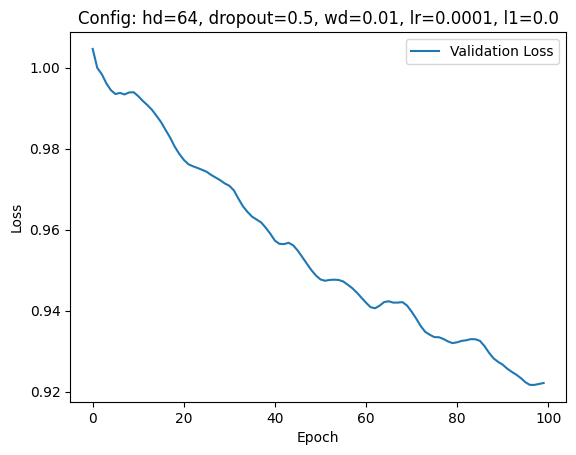

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9241


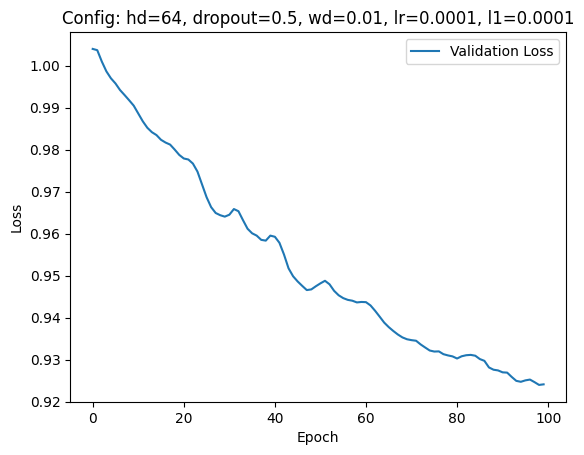

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9821


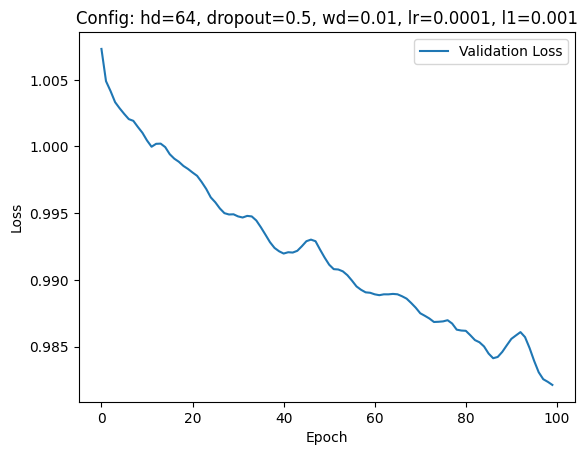

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9905


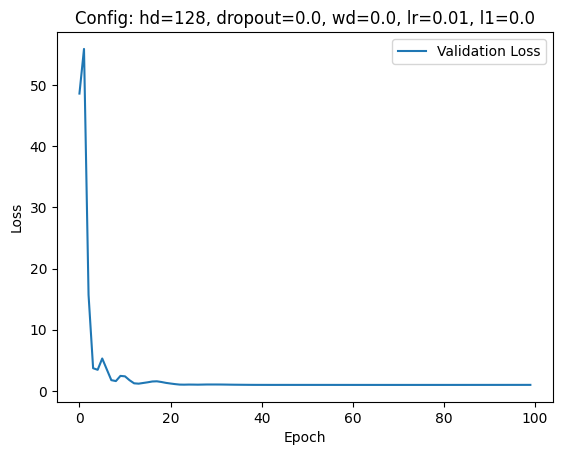

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8872


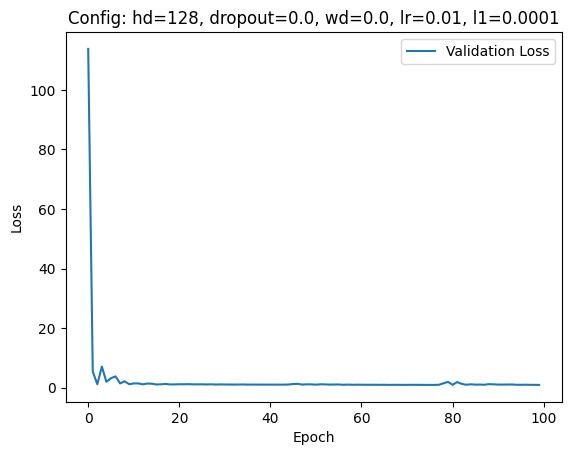

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9885


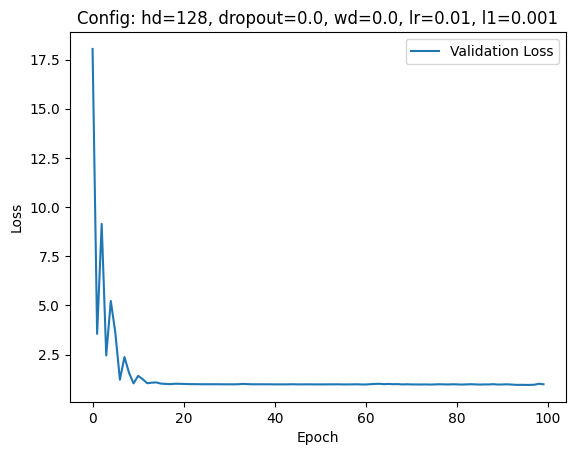

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9341


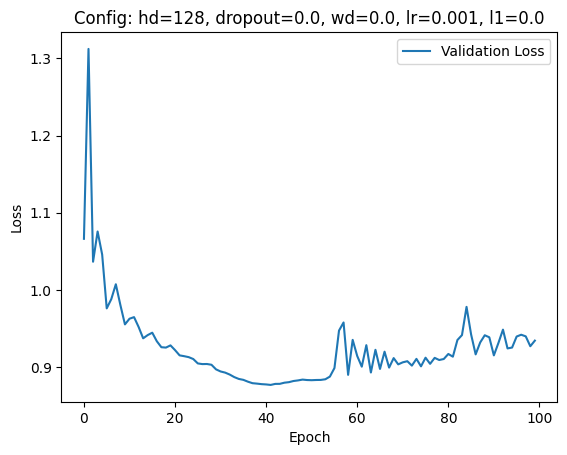

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9072


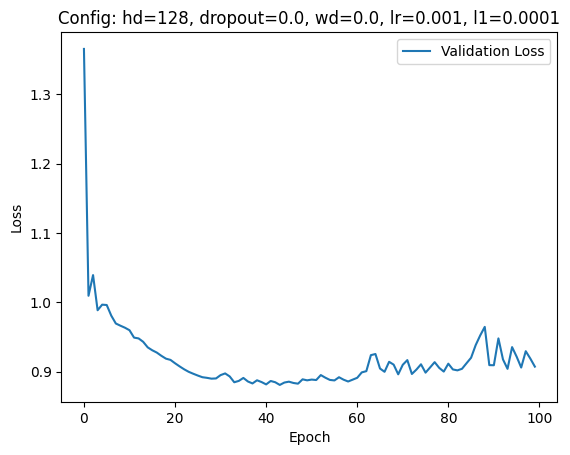

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8738


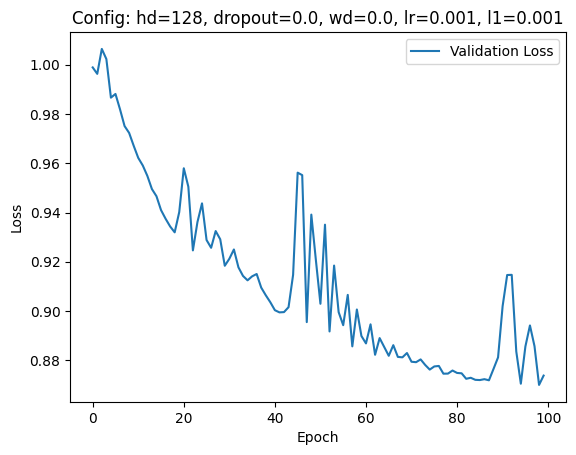

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9014


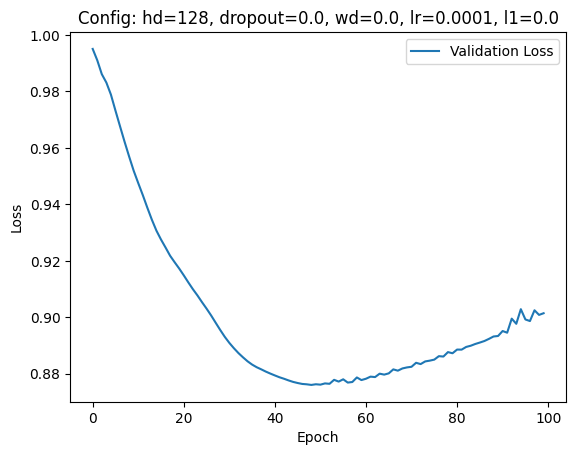

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8845


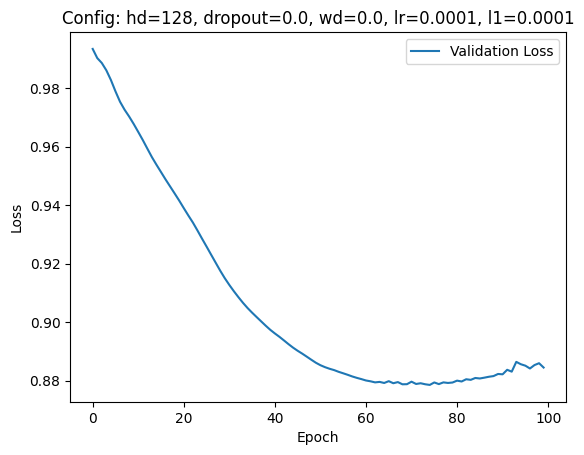

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9428


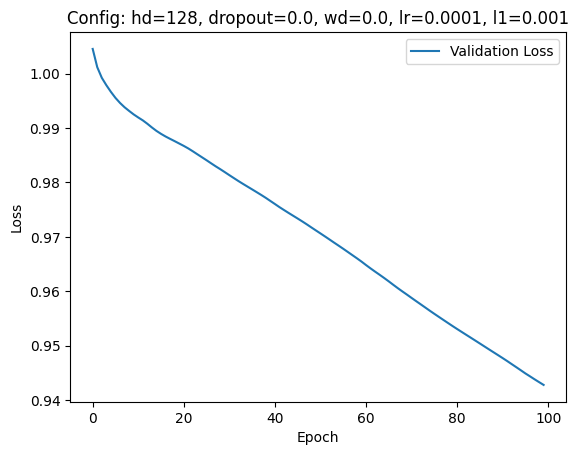

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9166


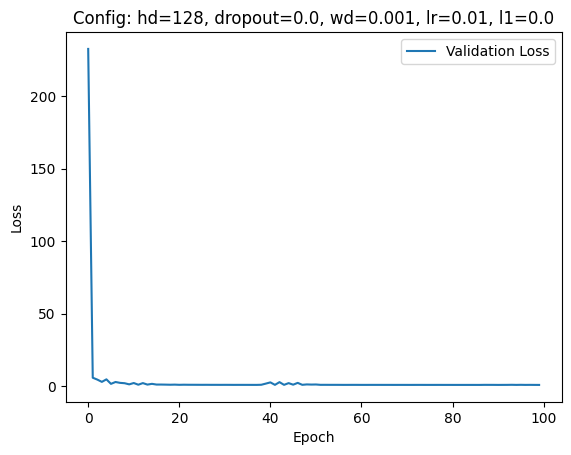

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8807


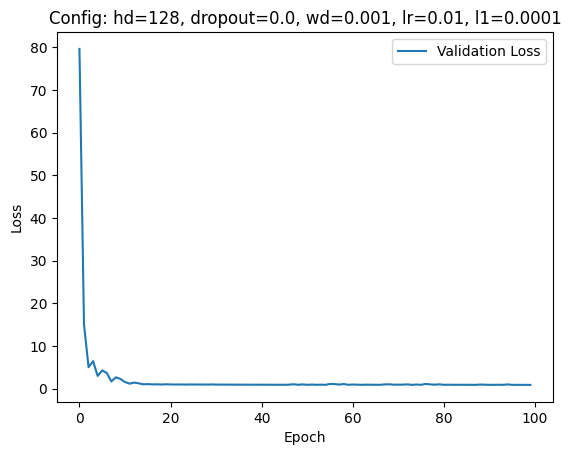

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9929


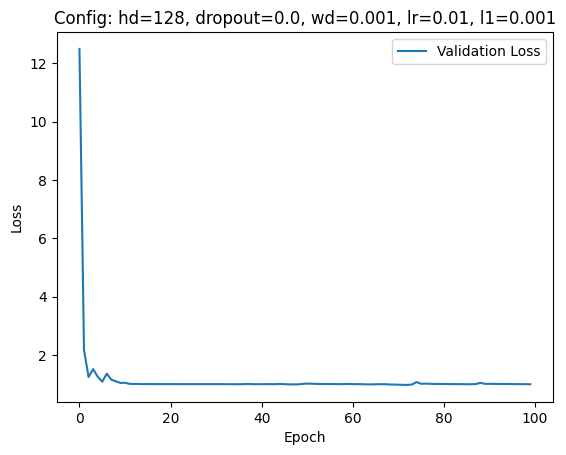

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9604


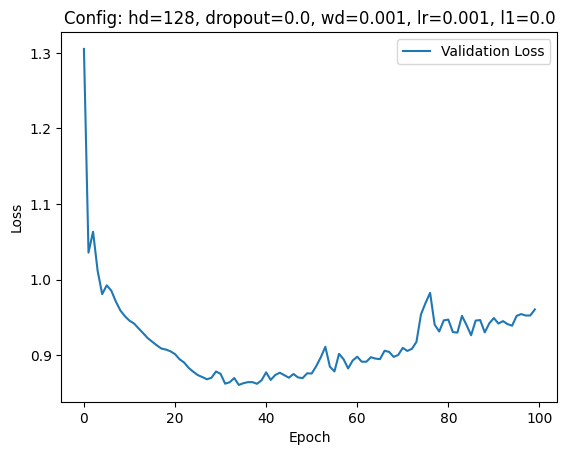

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8958


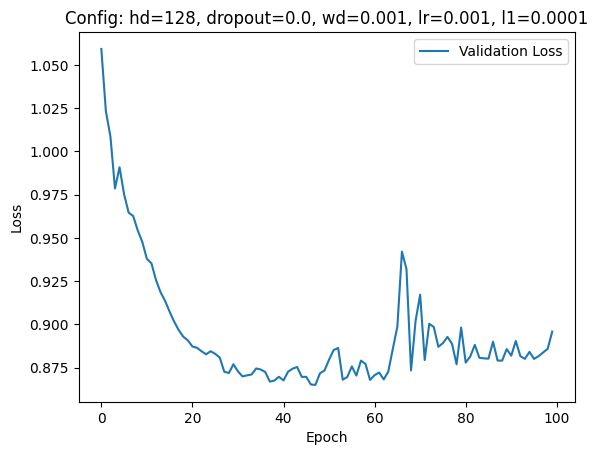

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8828


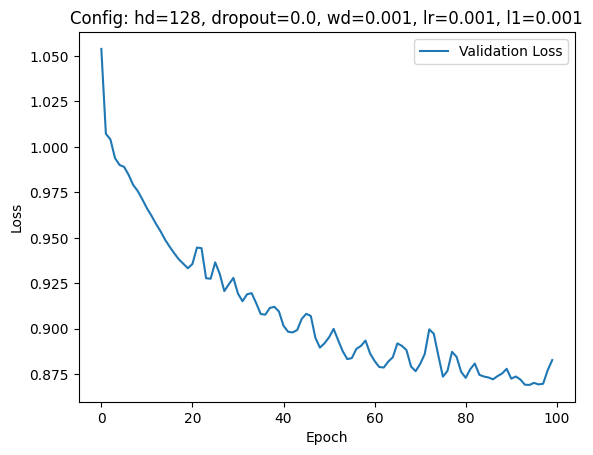

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8797


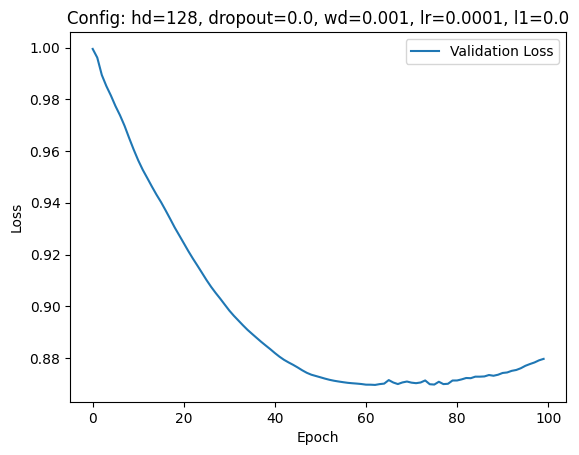

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8832


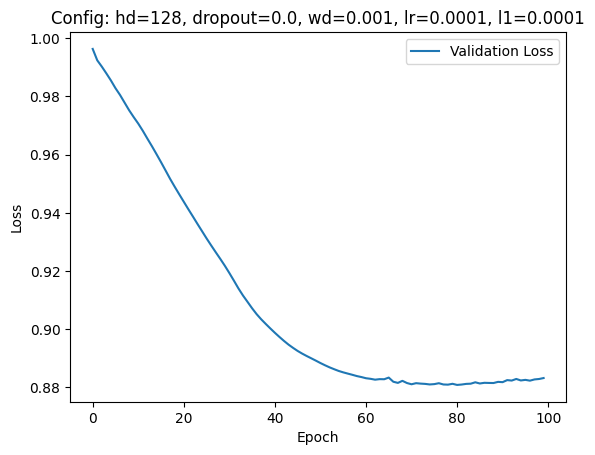

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9278


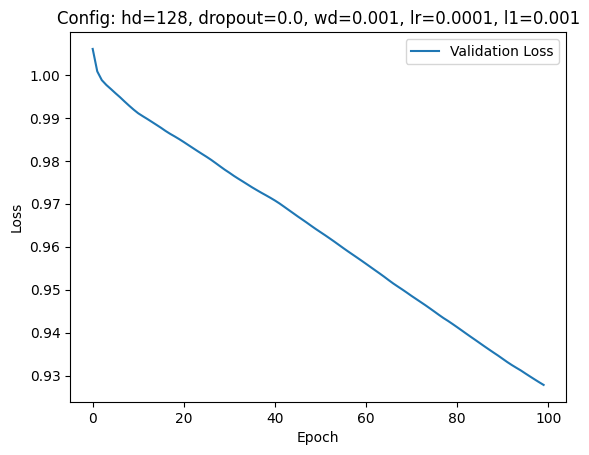

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8904


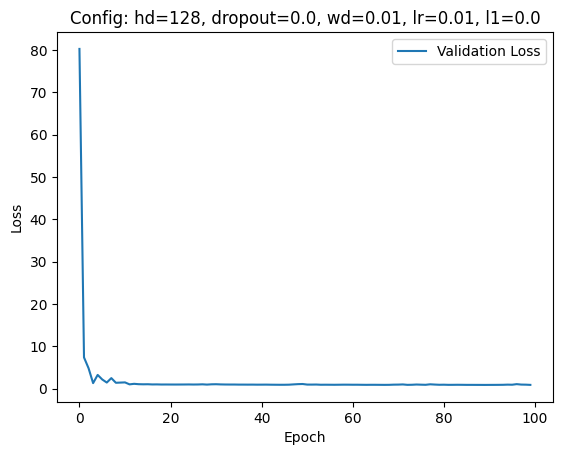

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.1487


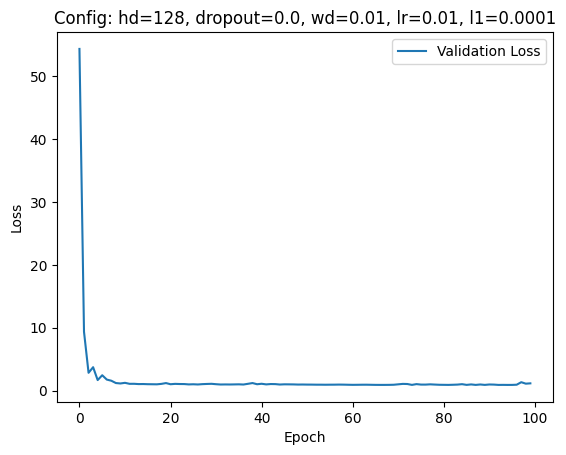

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9637


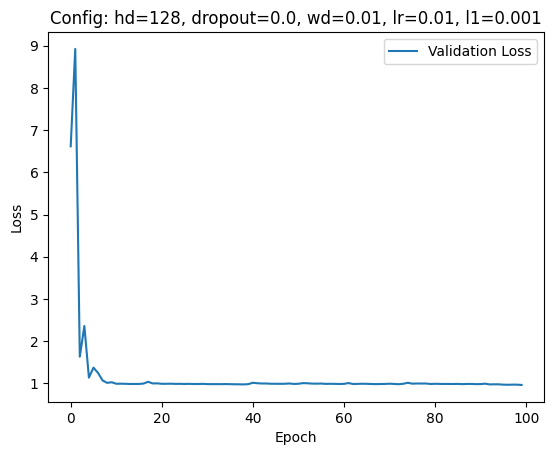

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.1906


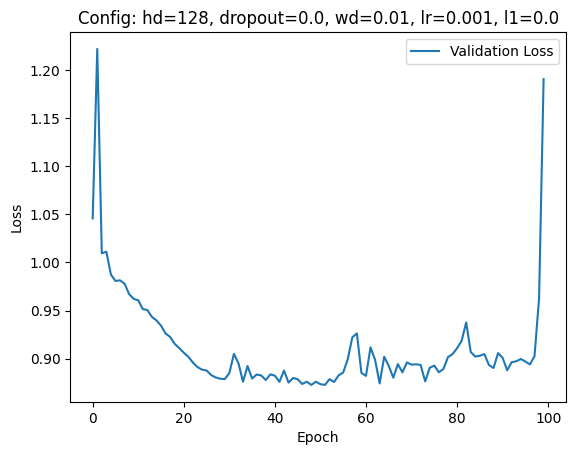

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8867


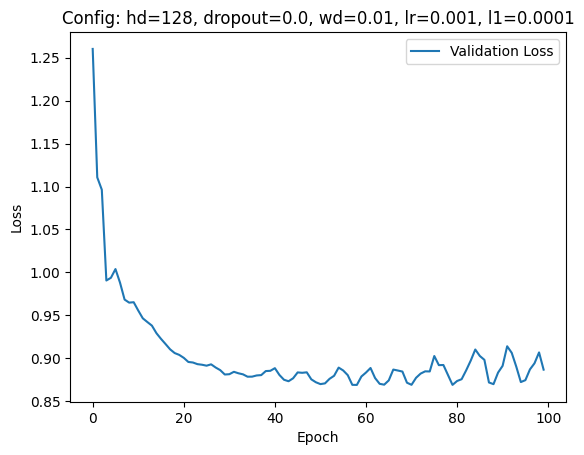

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8709


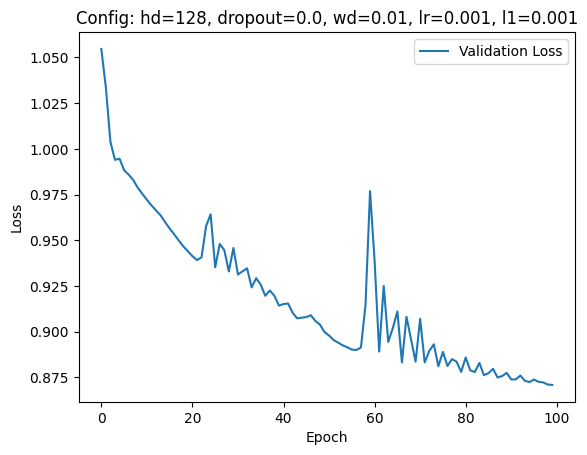

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8893


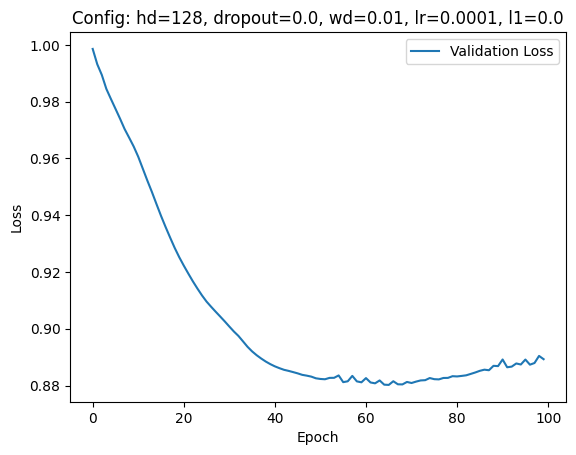

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8788


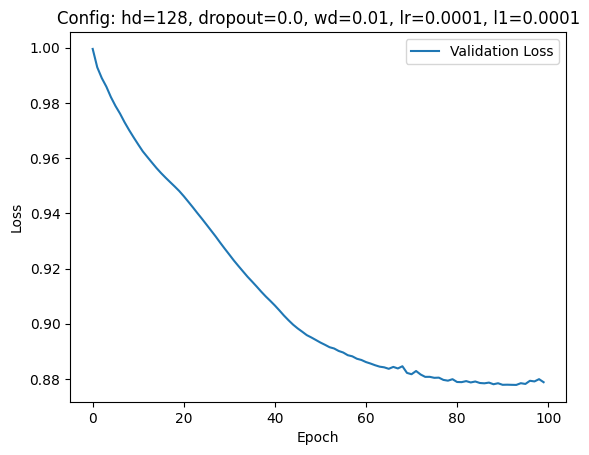

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9233


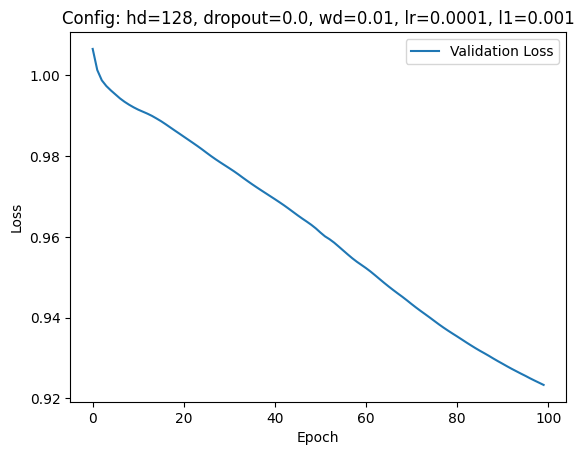

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0031


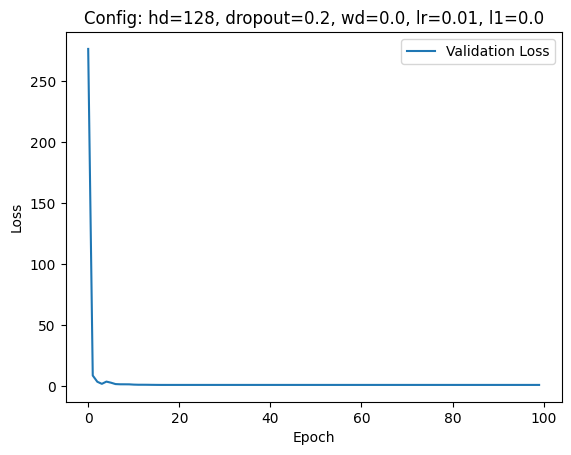

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0005


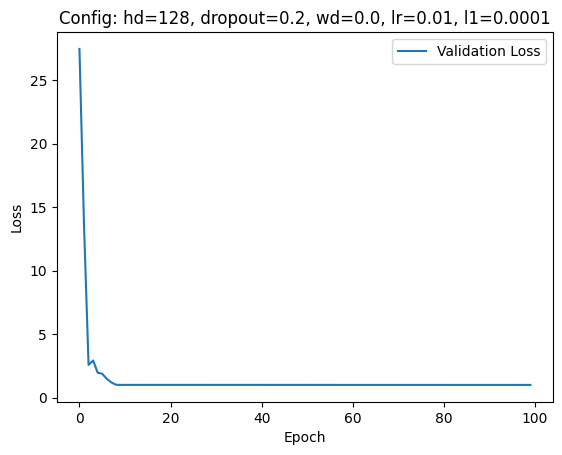

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0011


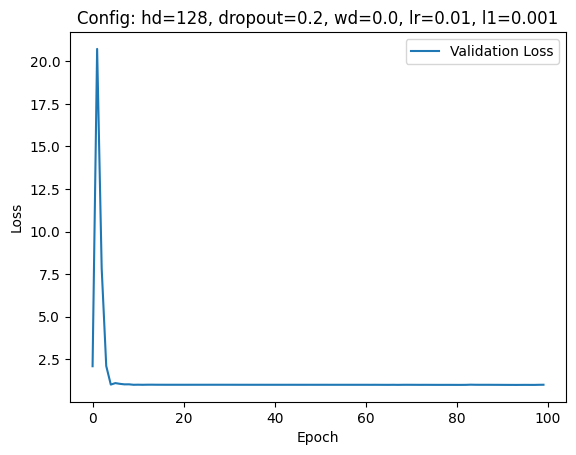

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9251


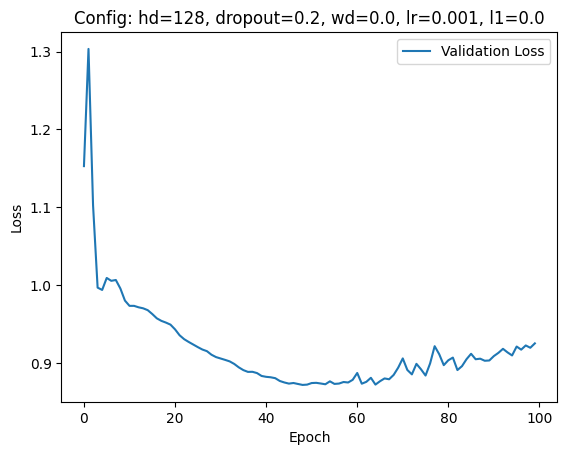

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9269


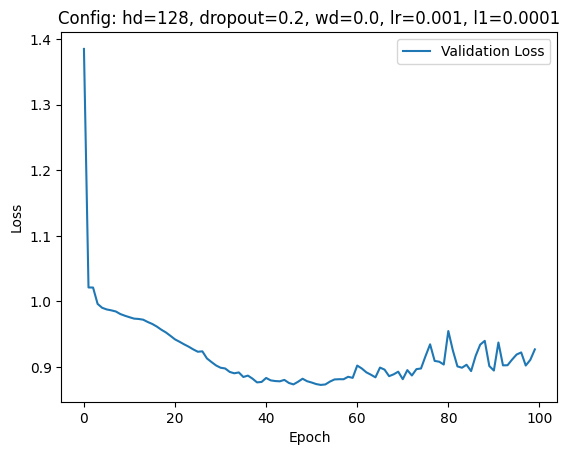

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9016


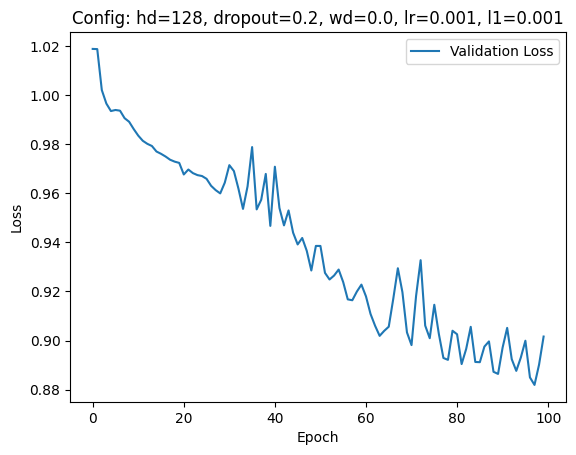

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8846


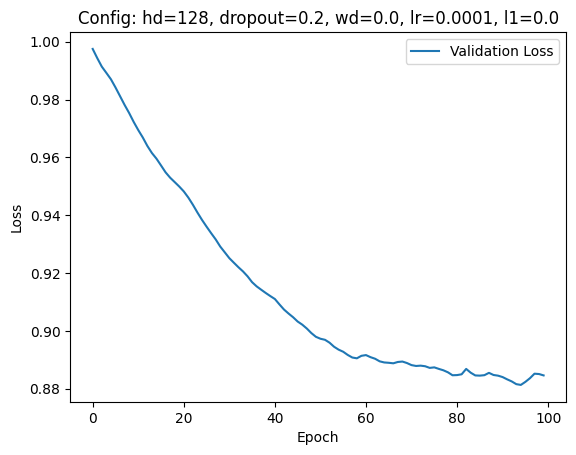

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8717


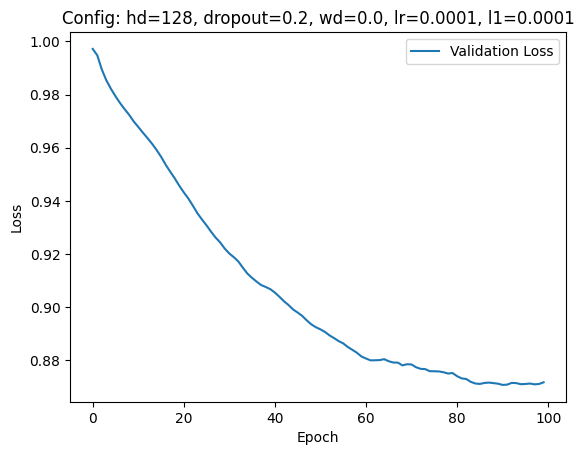

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9319


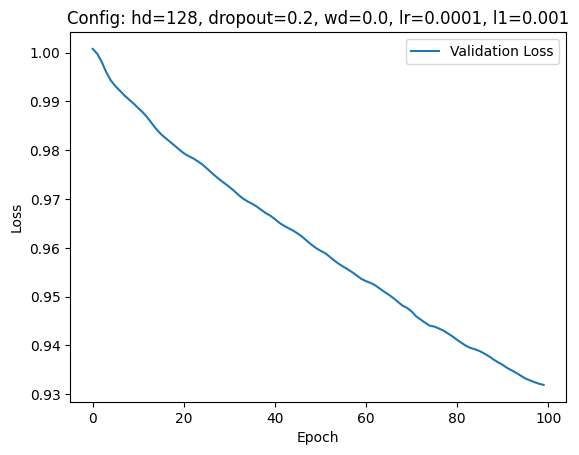

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0025


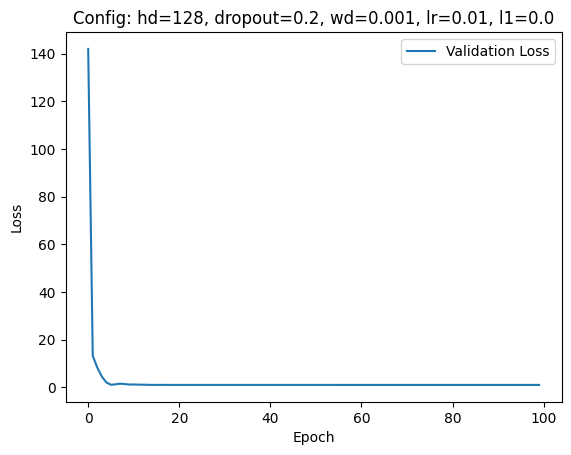

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0075


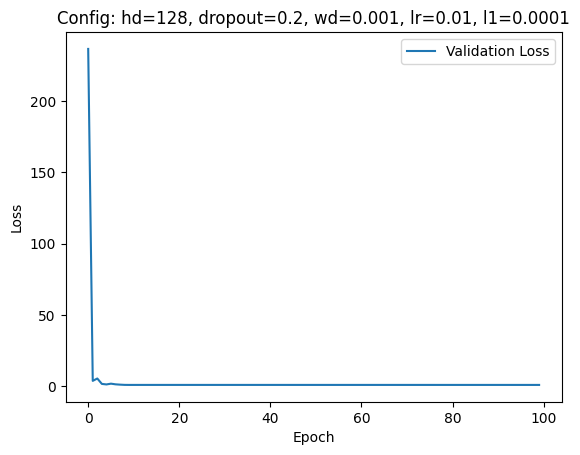

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9993


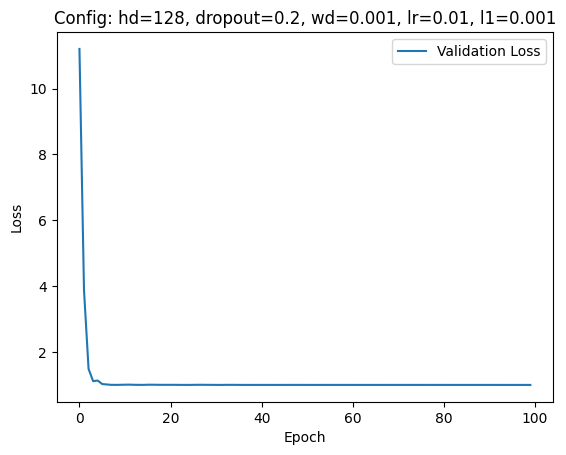

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9436


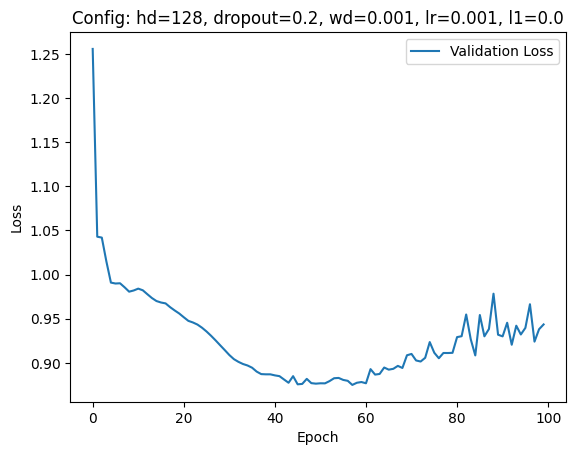

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9398


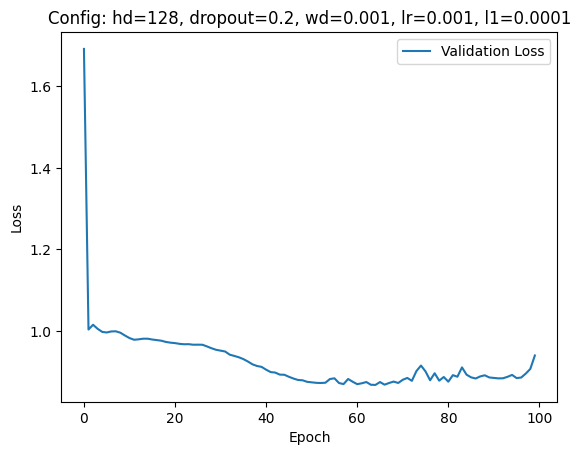

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8812


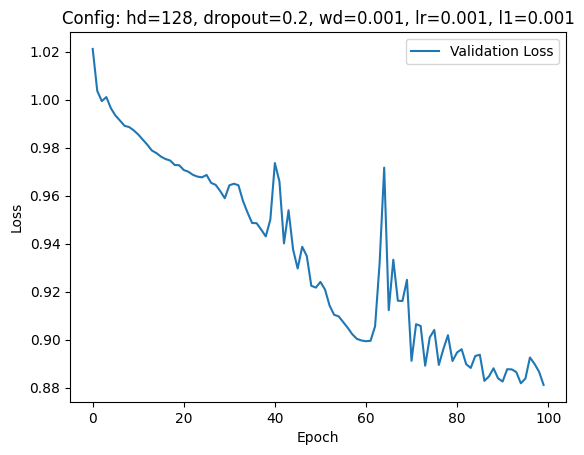

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8799


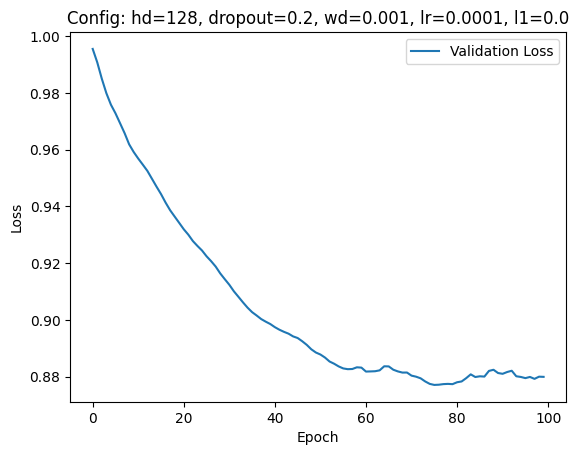

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8708


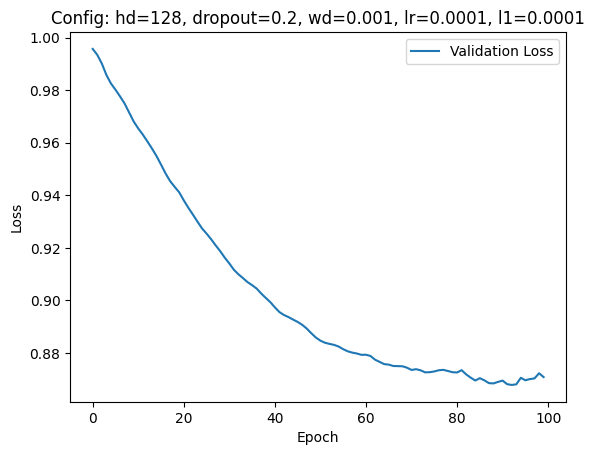

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9361


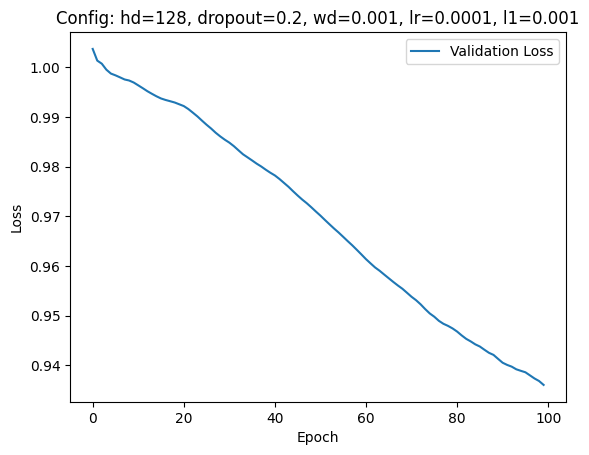

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0026


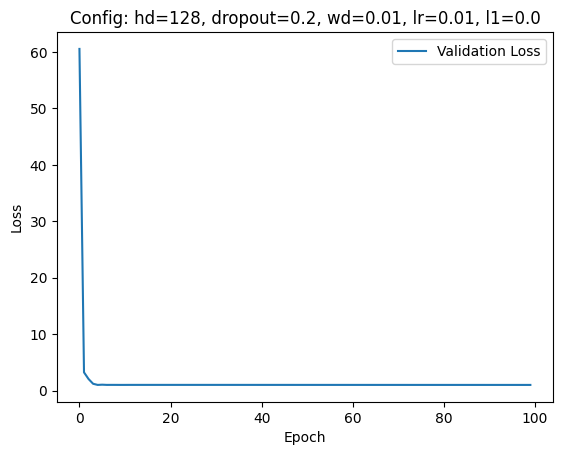

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9908


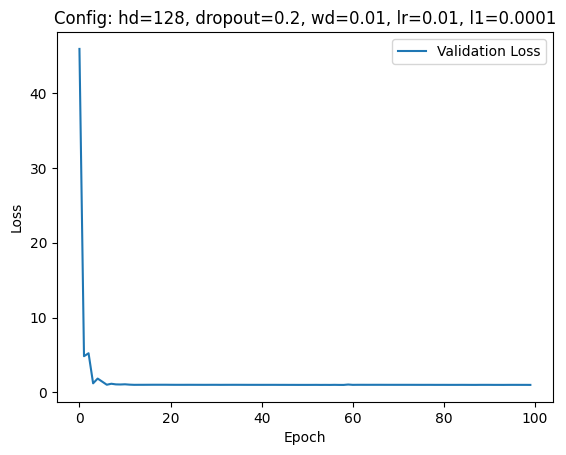

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0004


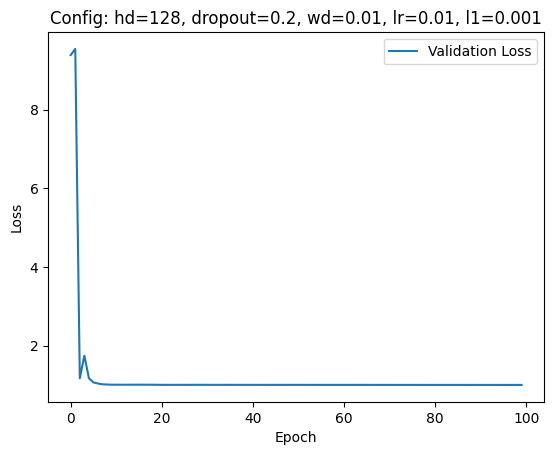

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9015


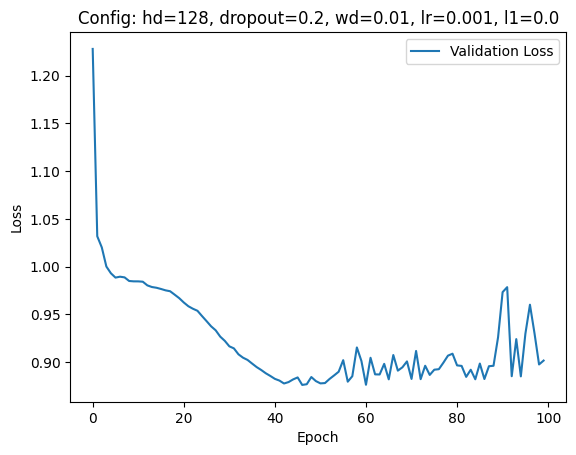

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9285


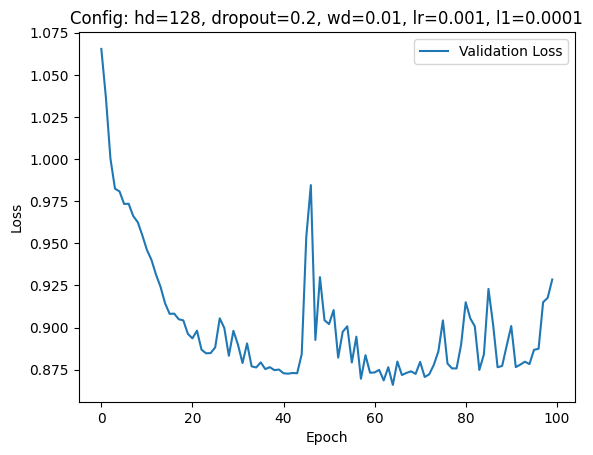

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8999


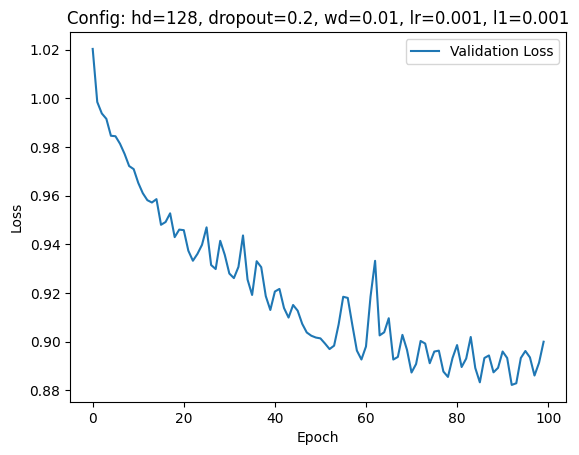

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8886


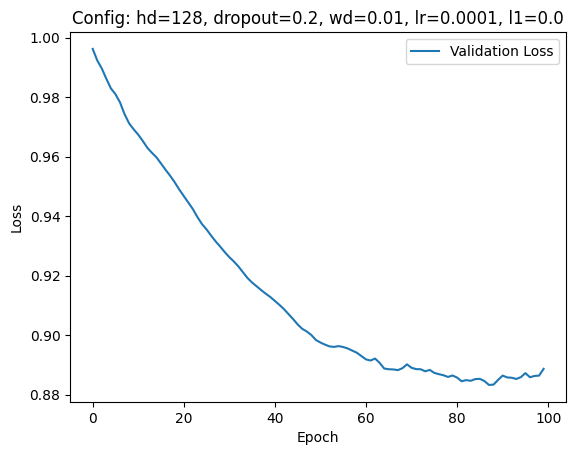

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8749


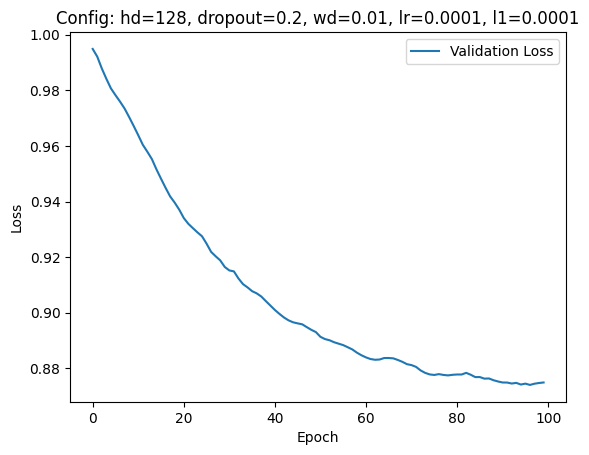

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9381


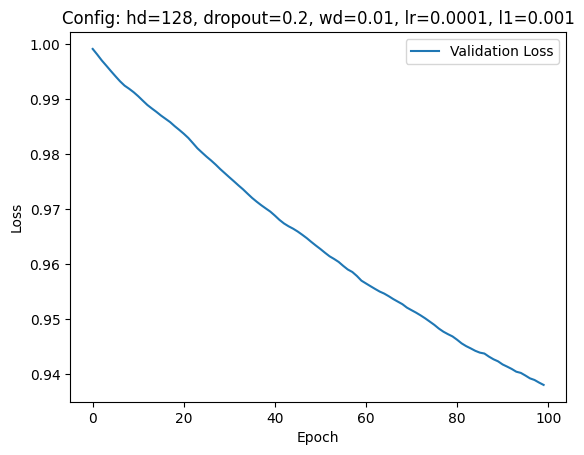

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0056


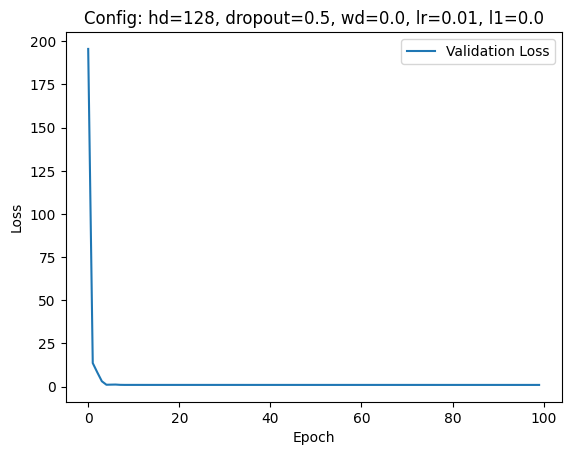

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0003


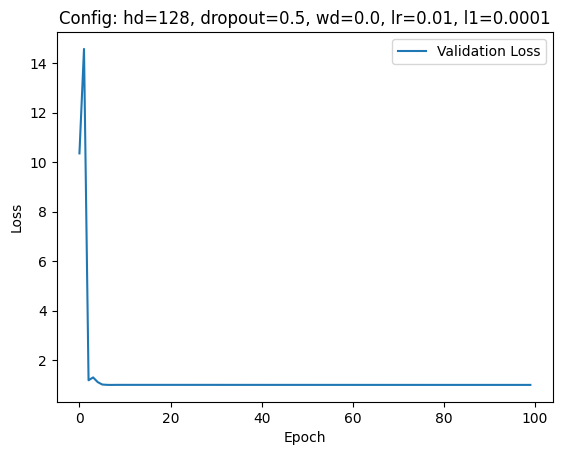

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0002


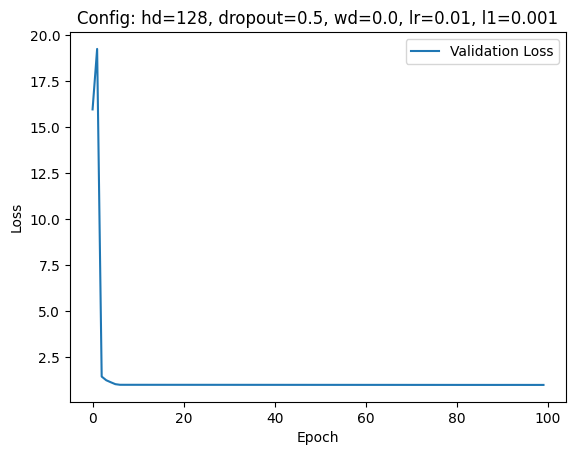

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8827


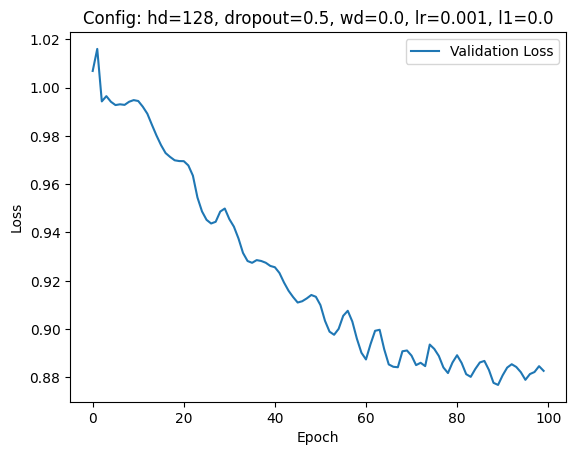

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8740


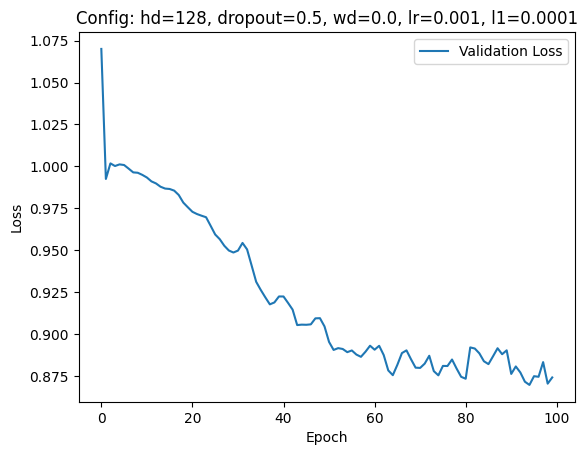

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9138


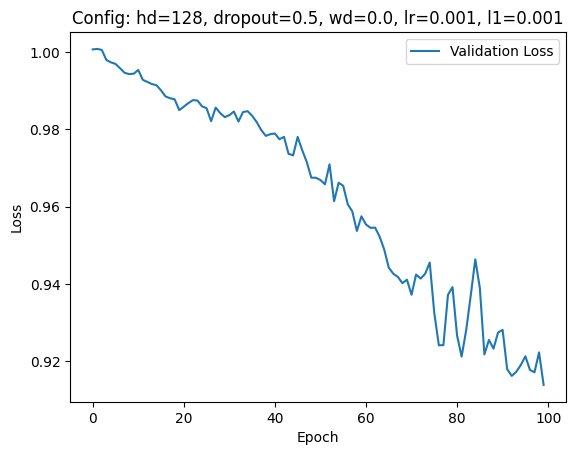

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8916


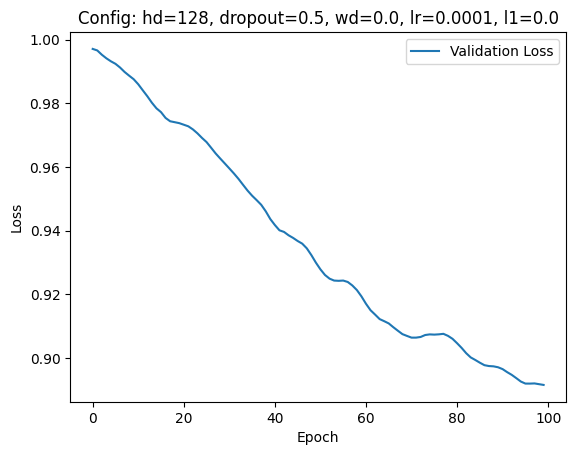

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8860


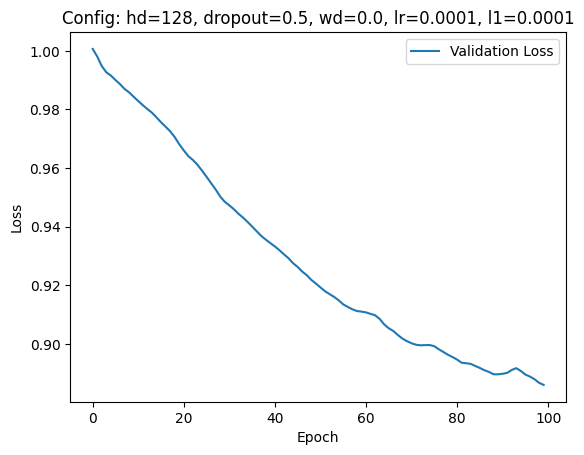

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9595


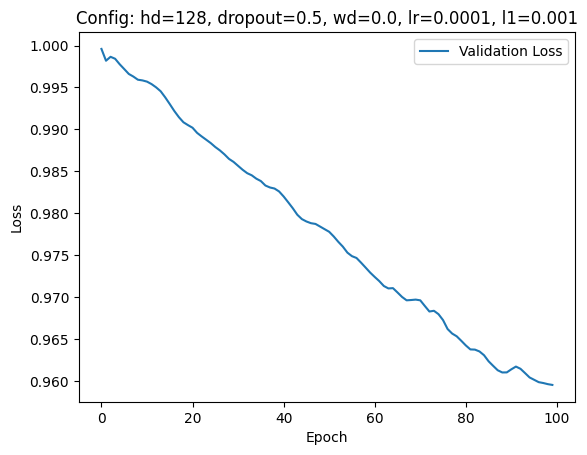

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0008


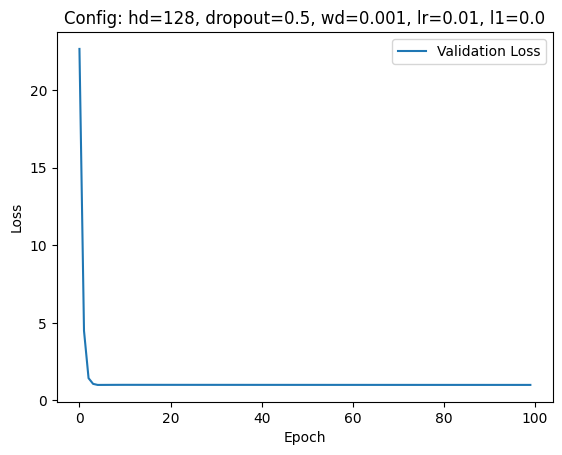

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0016


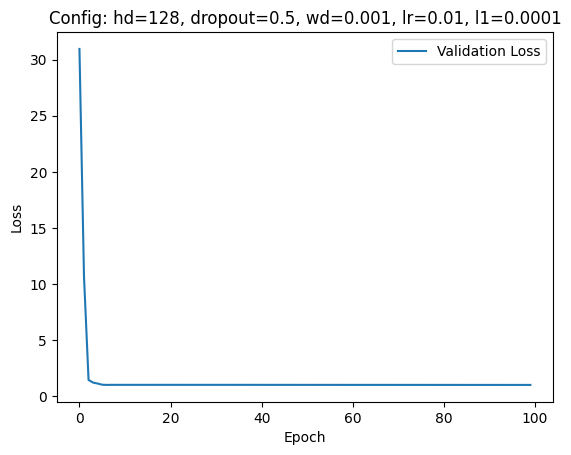

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0012


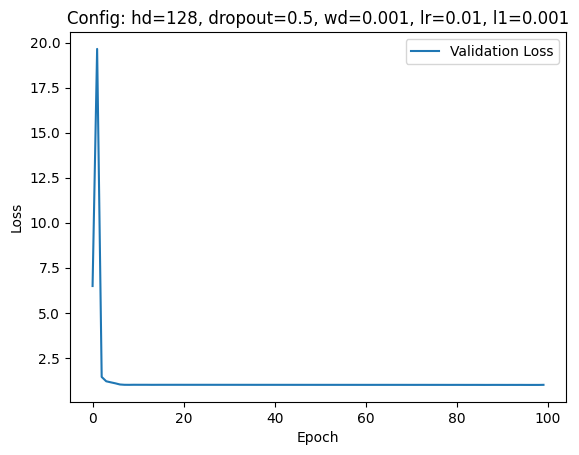

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9211


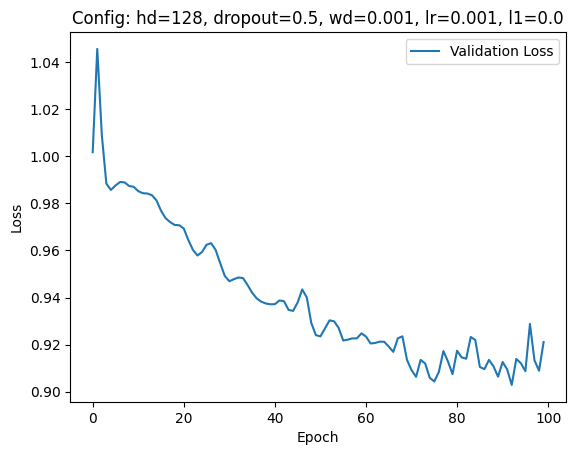

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8852


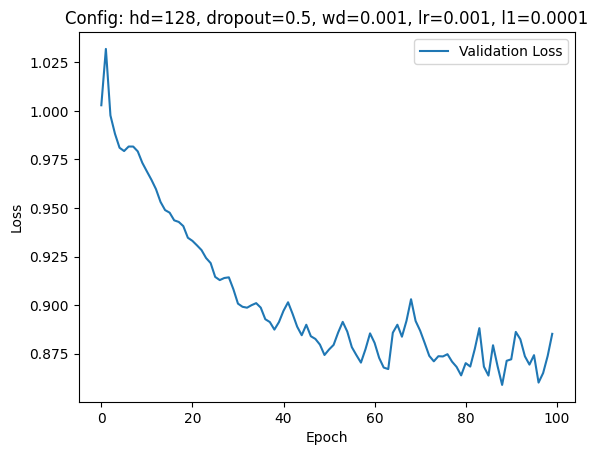

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9333


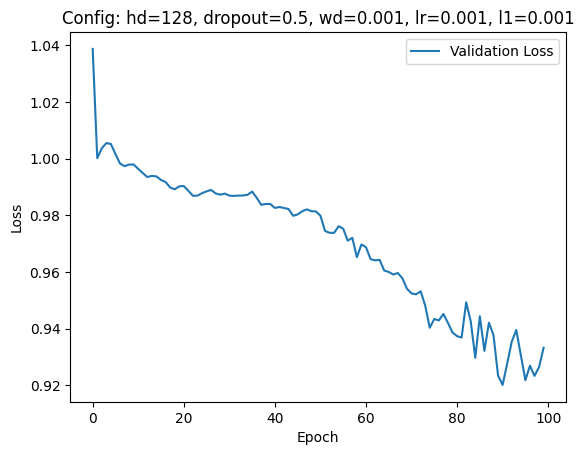

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8964


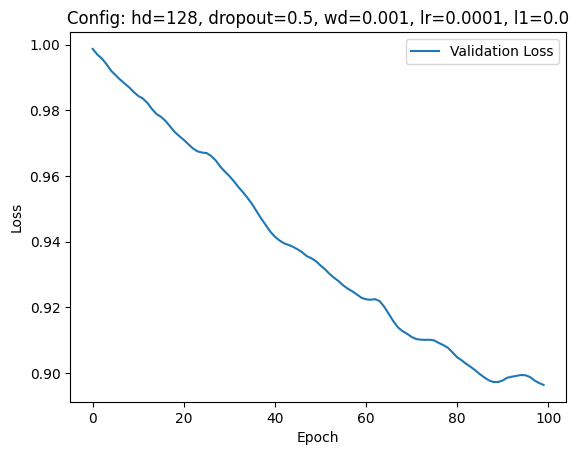

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8949


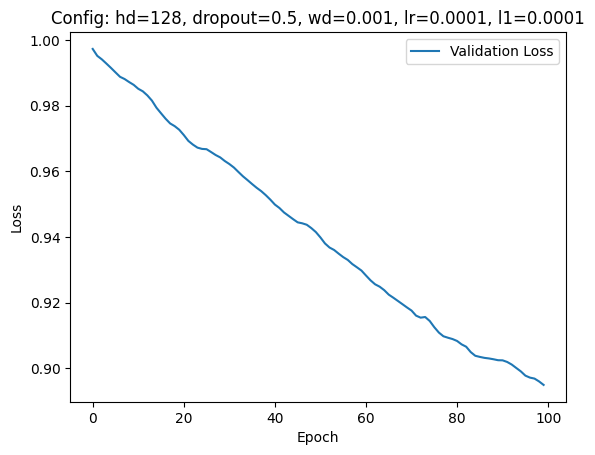

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9614


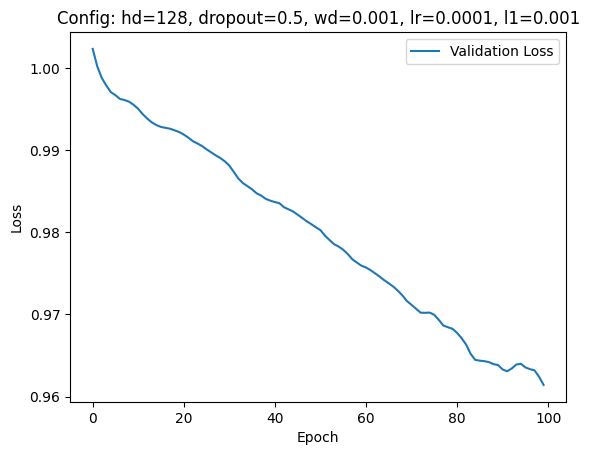

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0010


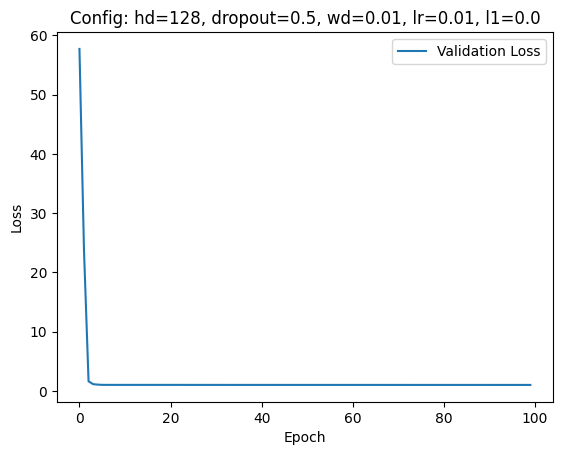

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0004


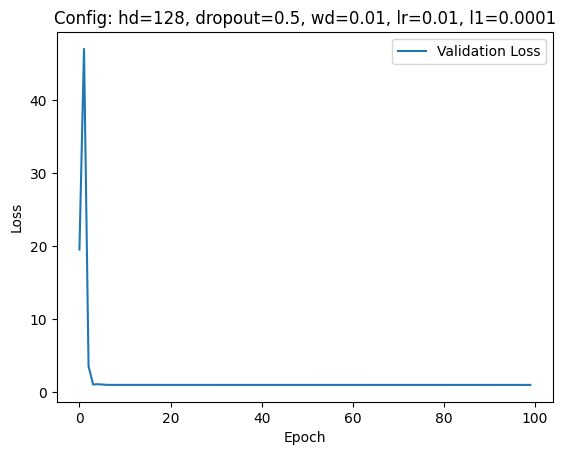

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0002


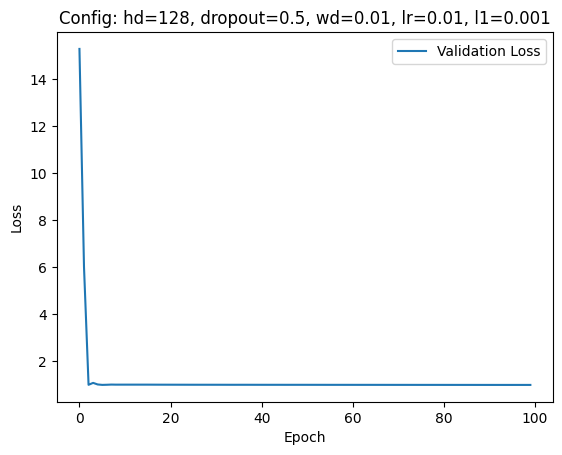

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8835


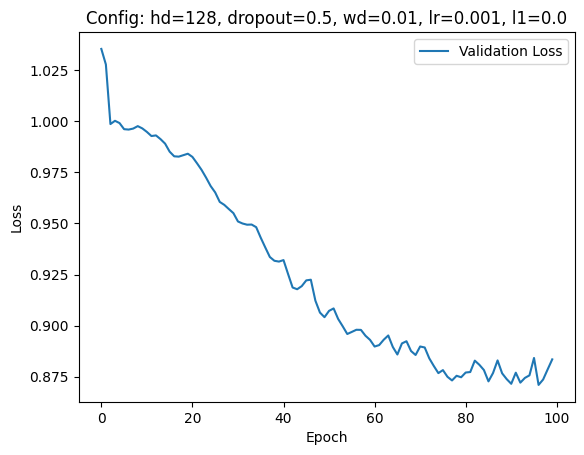

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8799


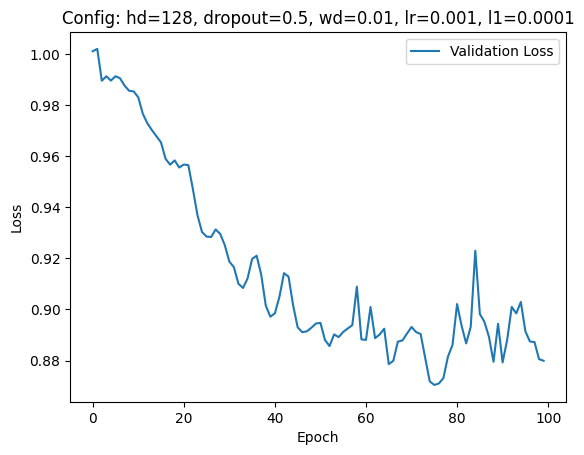

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9274


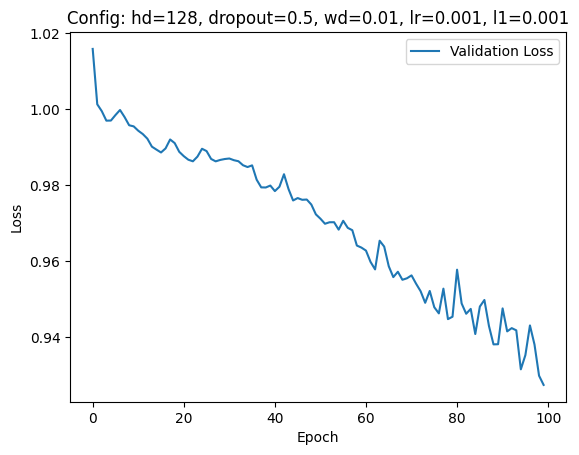

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8816


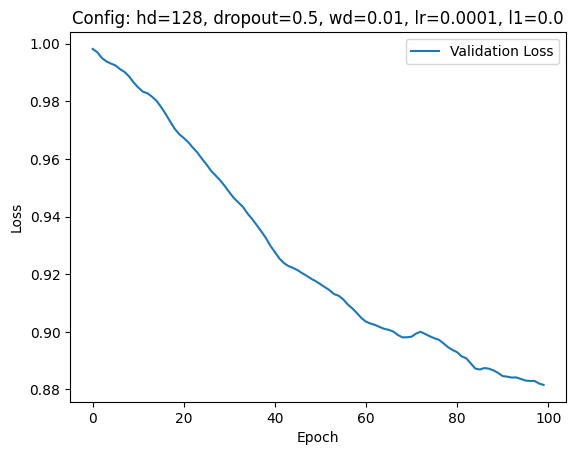

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9094


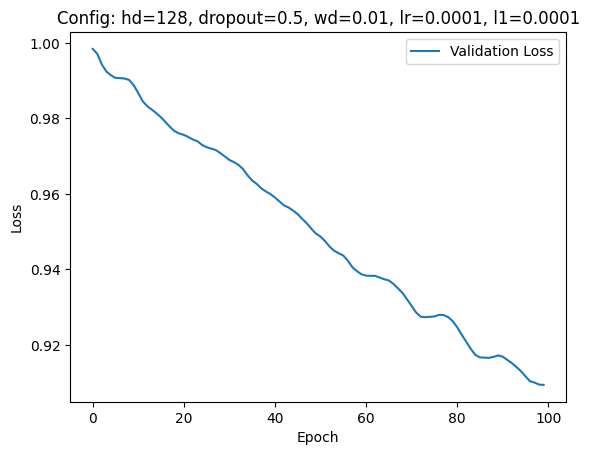

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9702


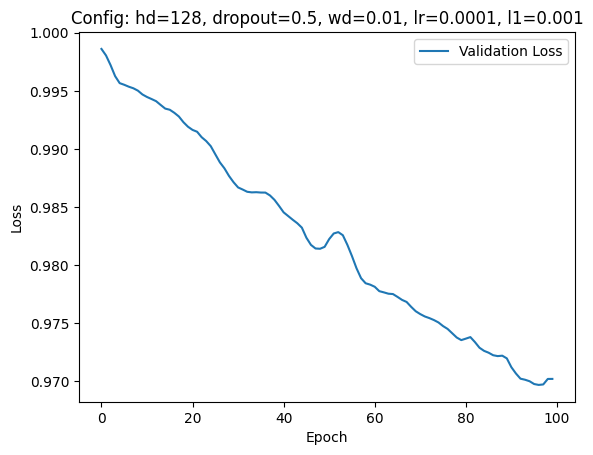

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9338


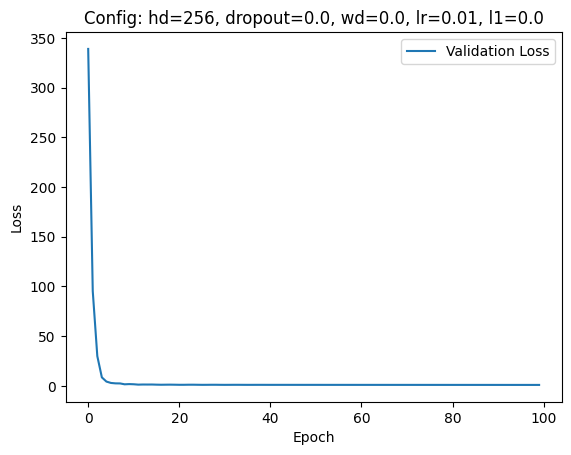

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0029


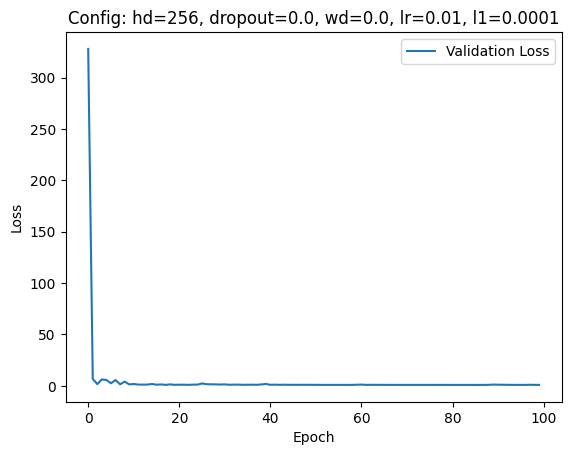

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9667


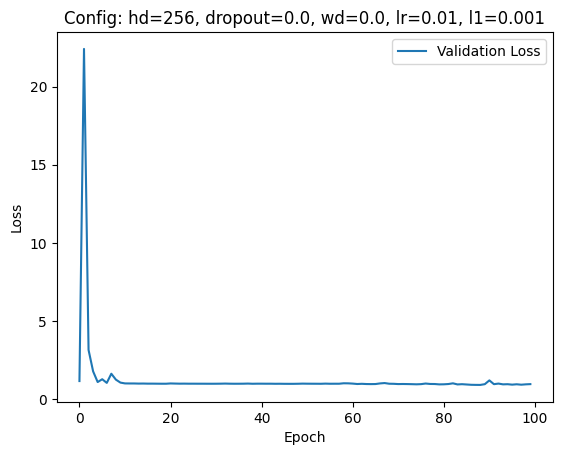

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9469


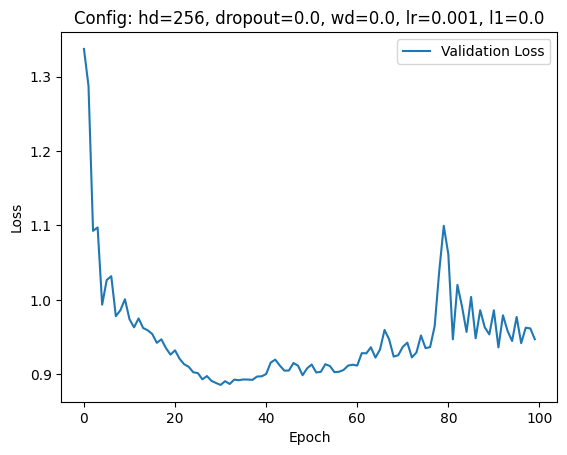

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8924


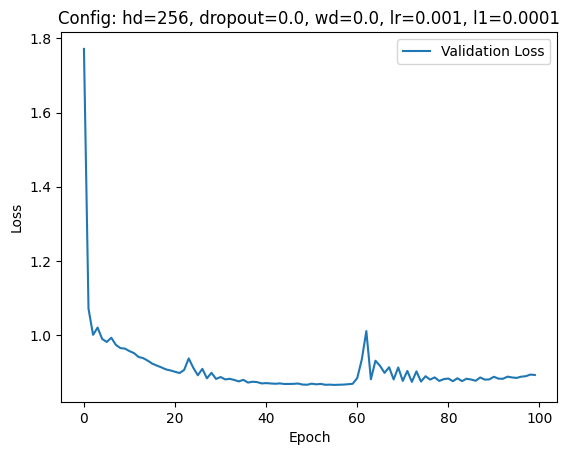

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8731


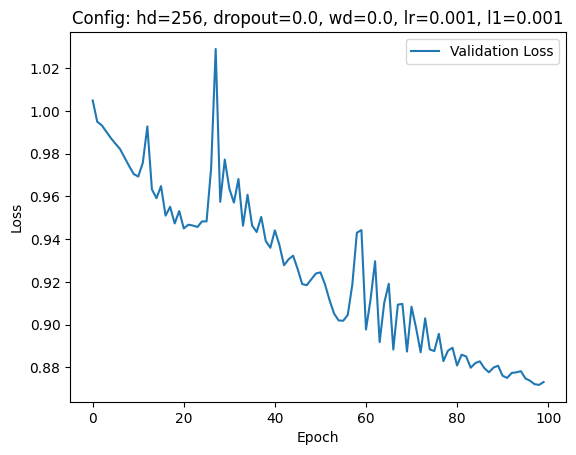

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9193


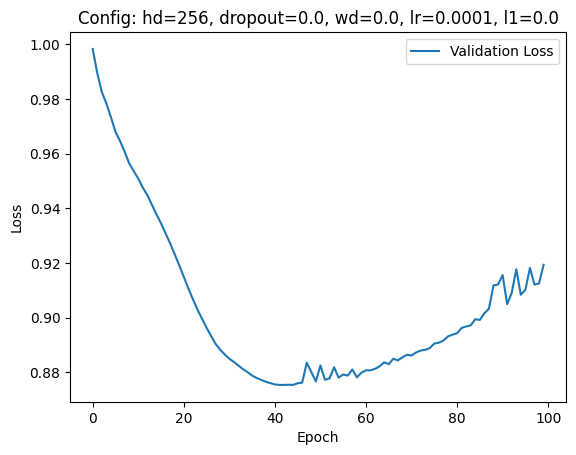

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8971


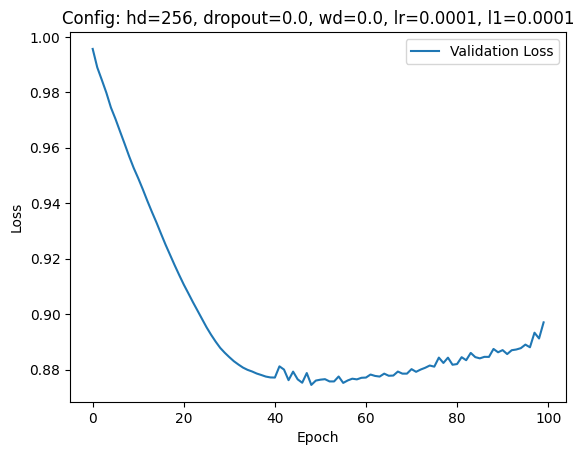

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9253


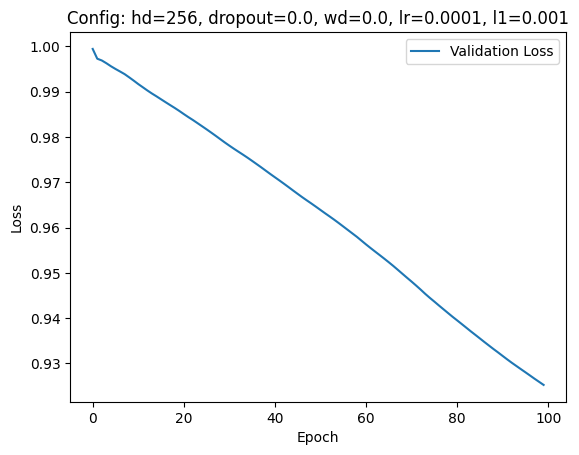

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0321


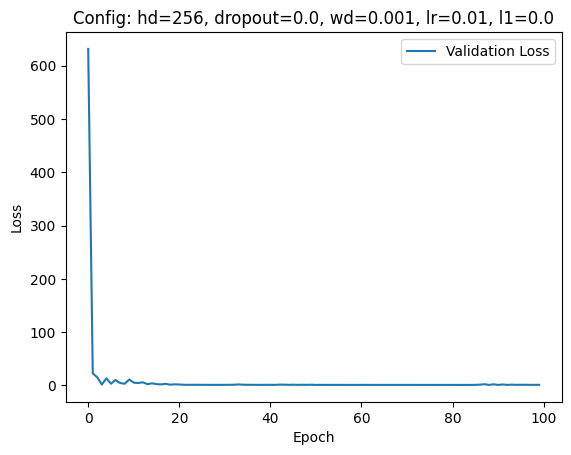

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8887


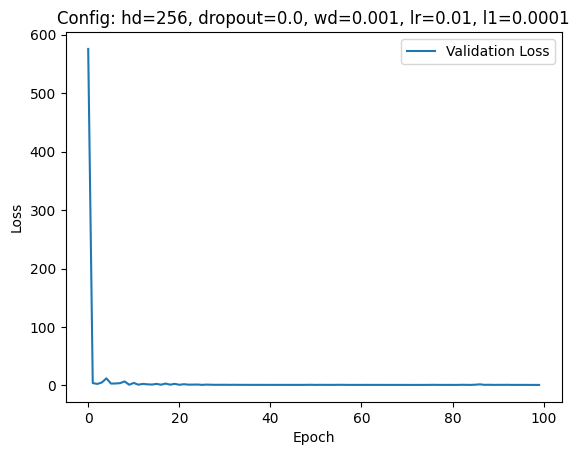

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9686


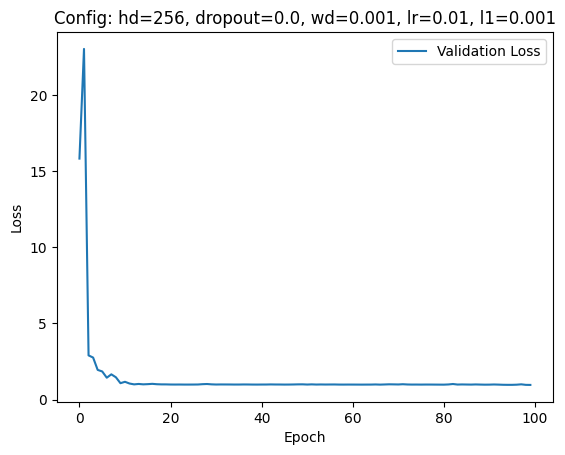

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9261


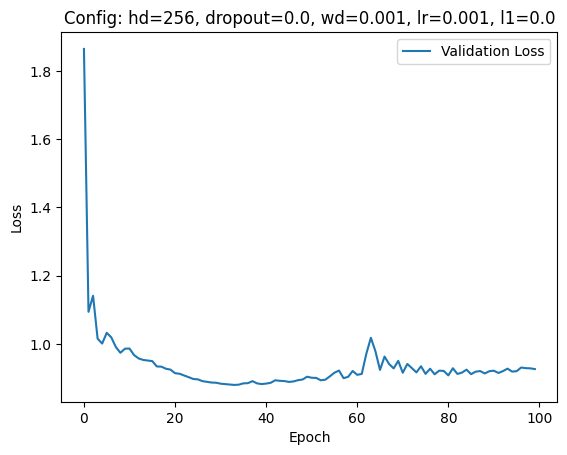

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9312


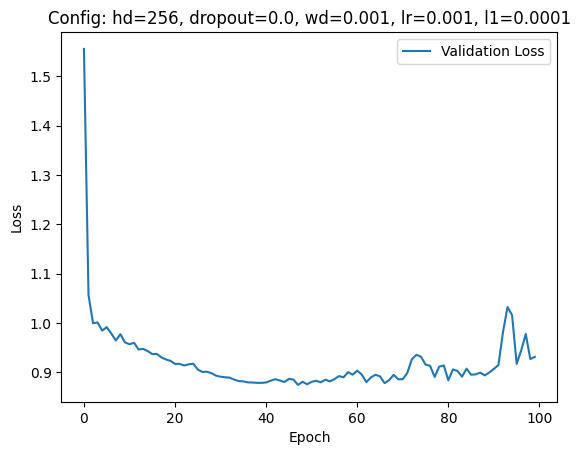

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8716


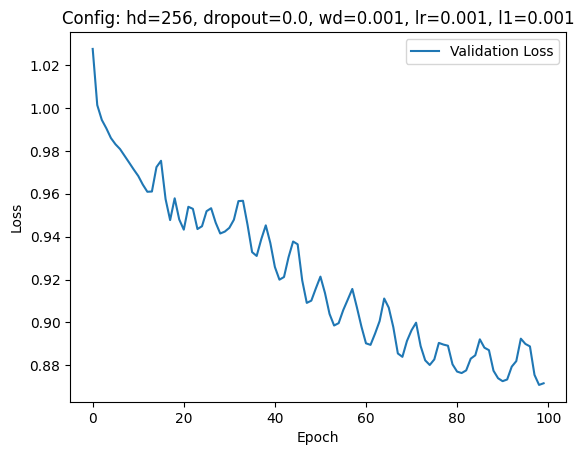

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9291


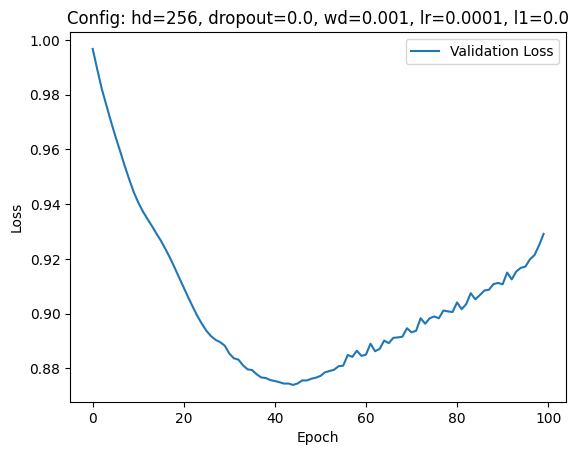

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9031


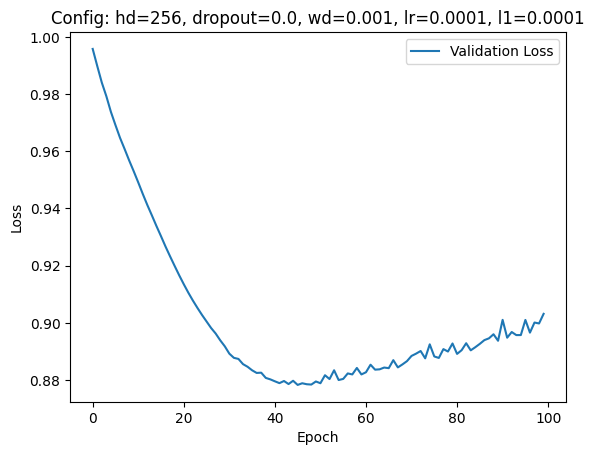

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9253


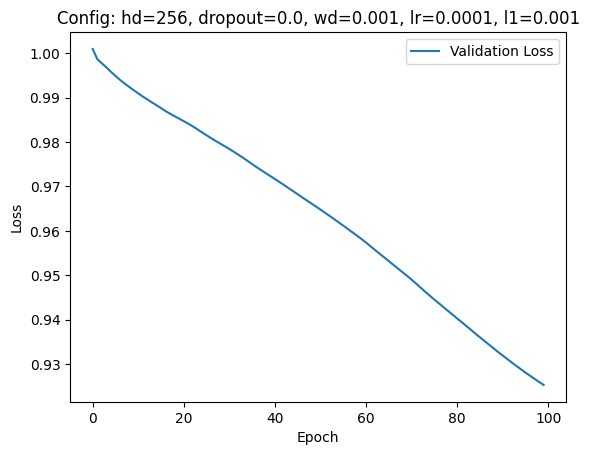

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.3093


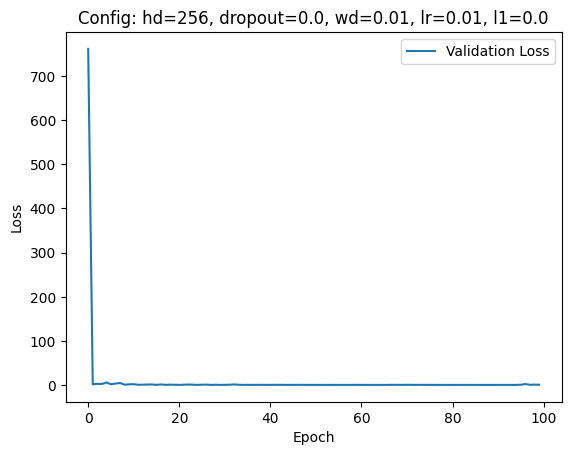

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9910


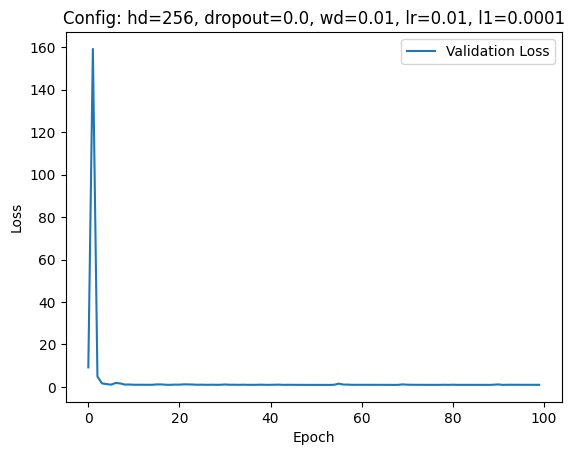

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9913


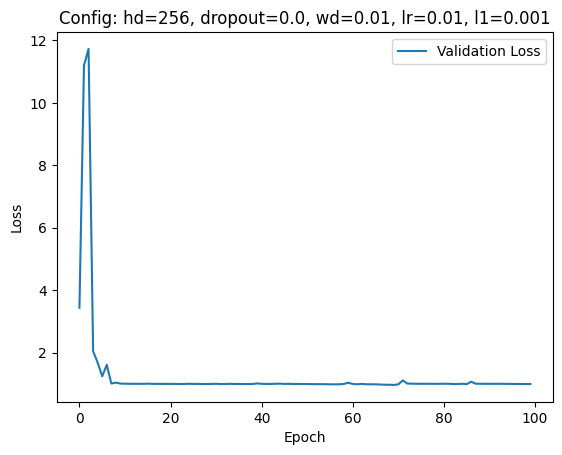

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9052


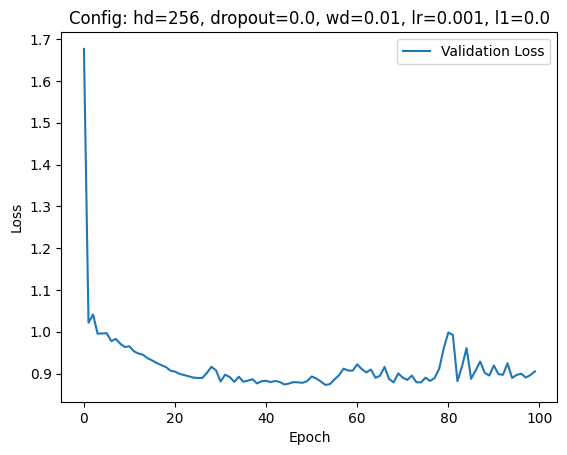

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8991


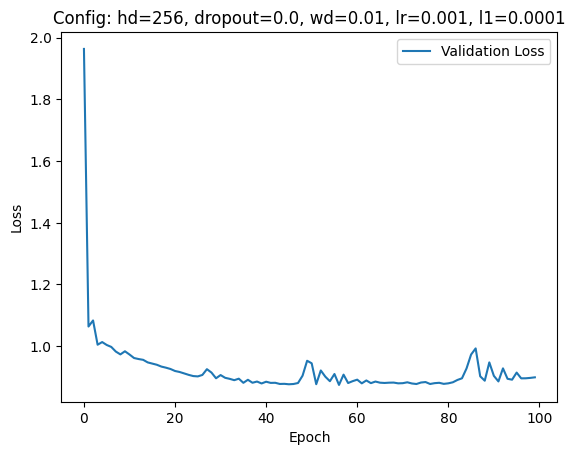

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8917


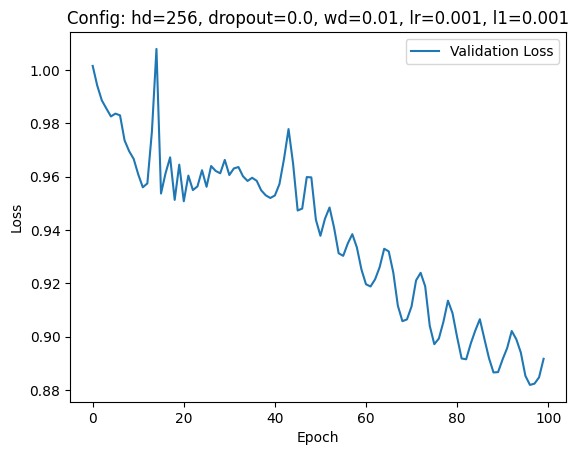

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8998


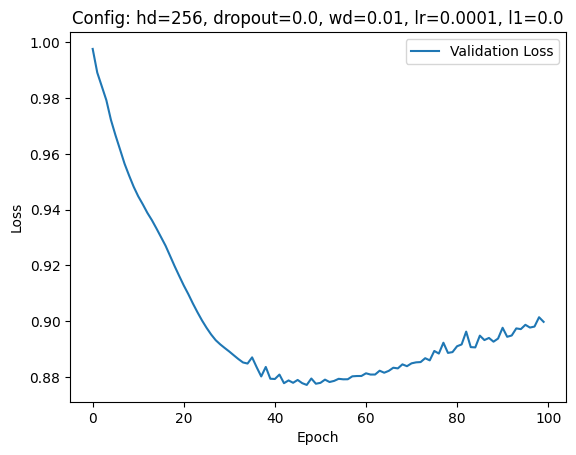

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8752


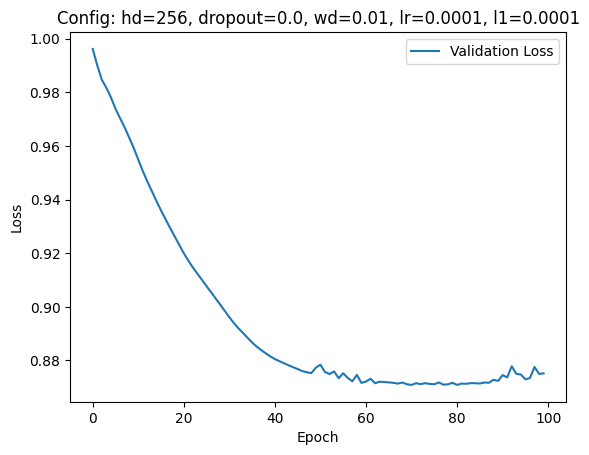

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9420


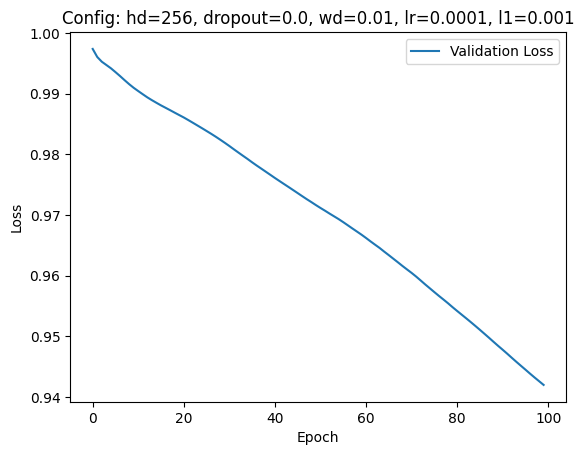

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0018


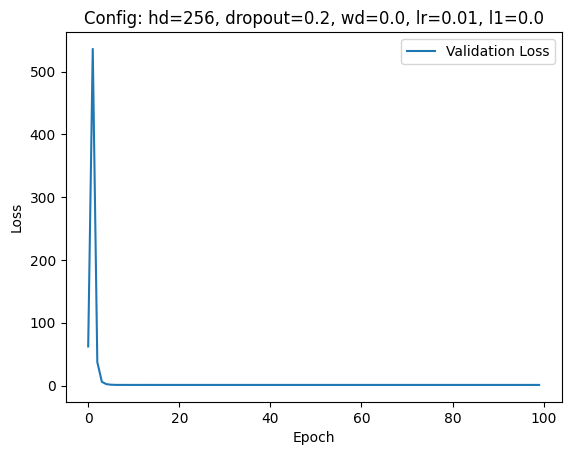

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0046


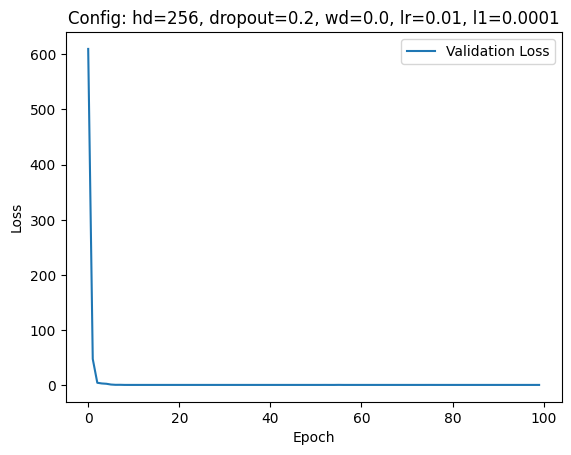

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9983


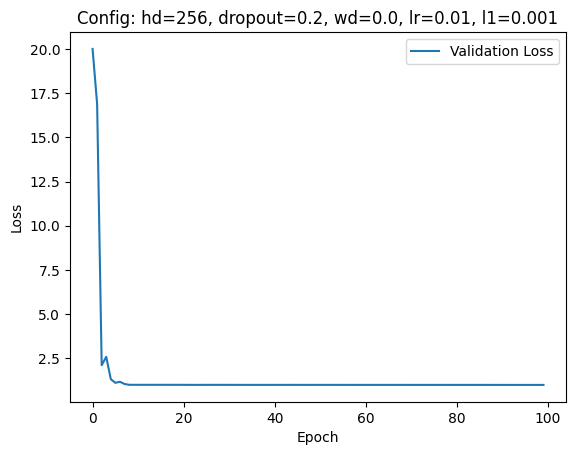

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9961


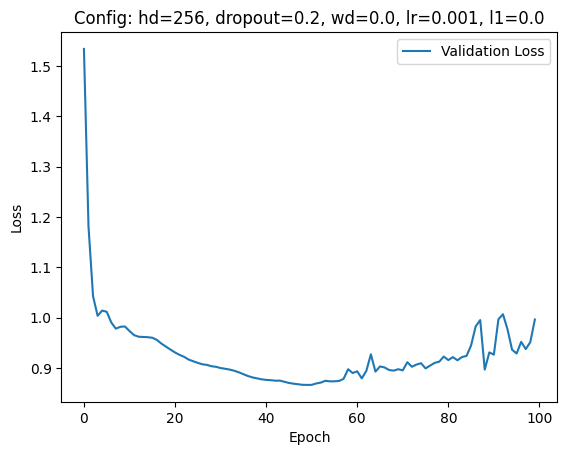

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9496


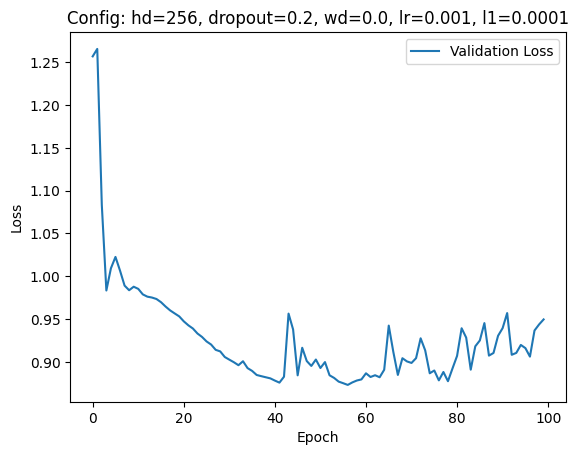

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8858


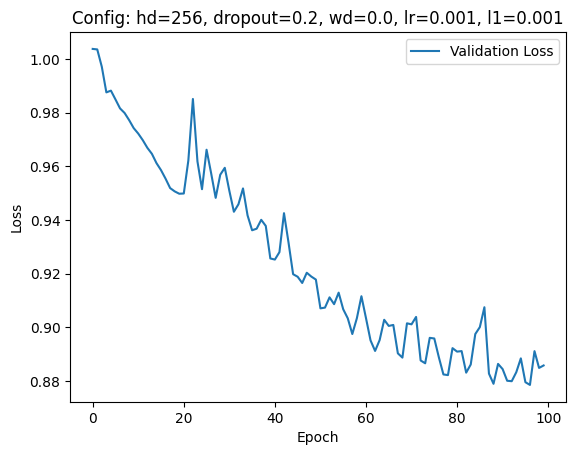

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8950


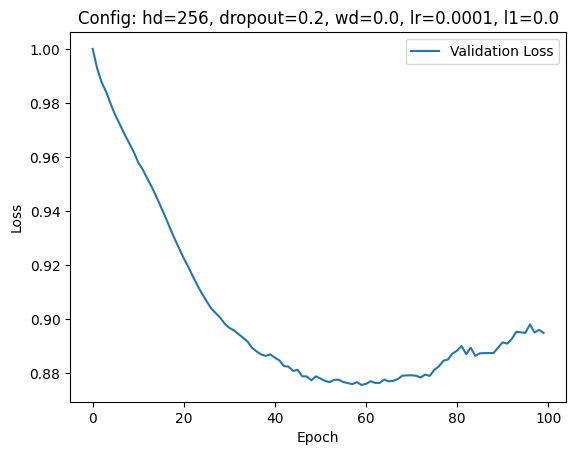

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8864


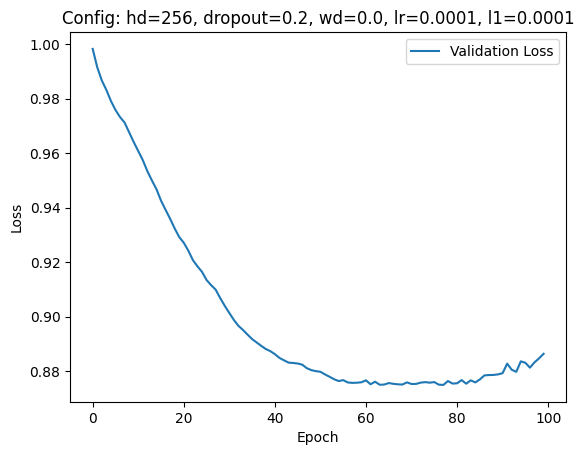

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9265


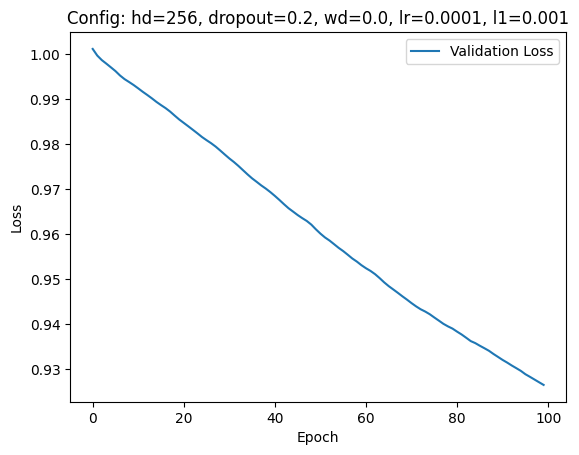

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0014


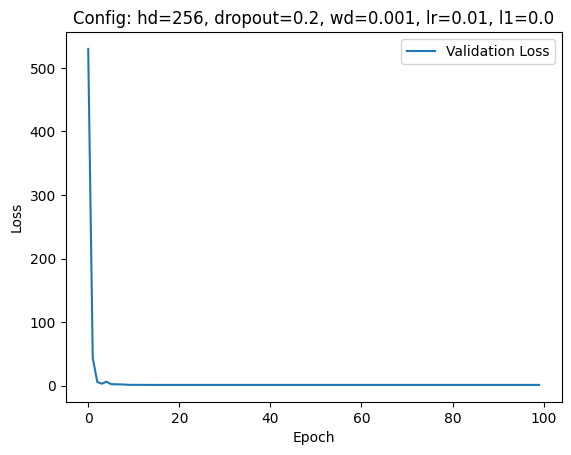

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0008


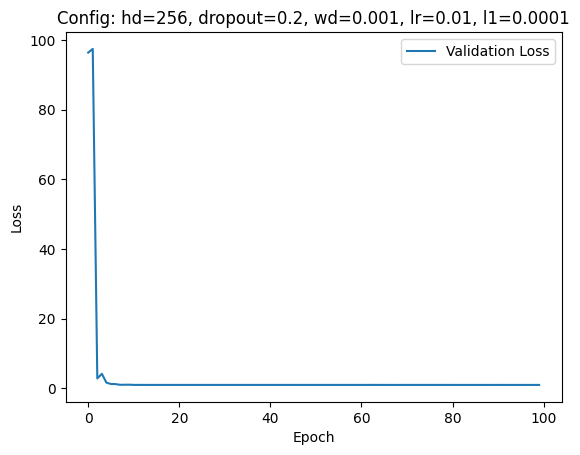

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0027


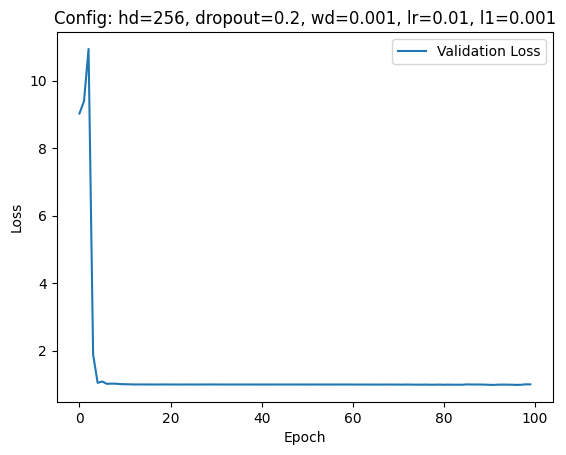

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9855


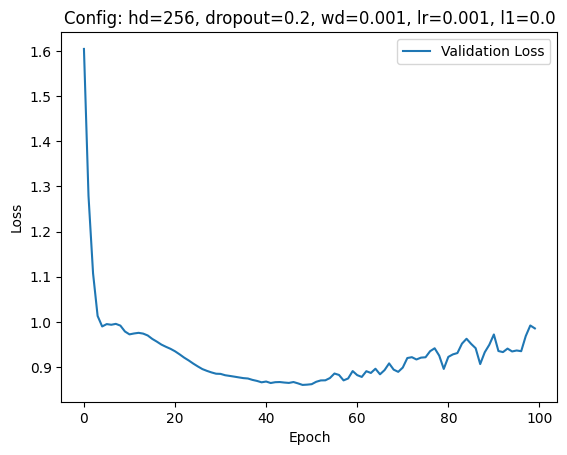

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9012


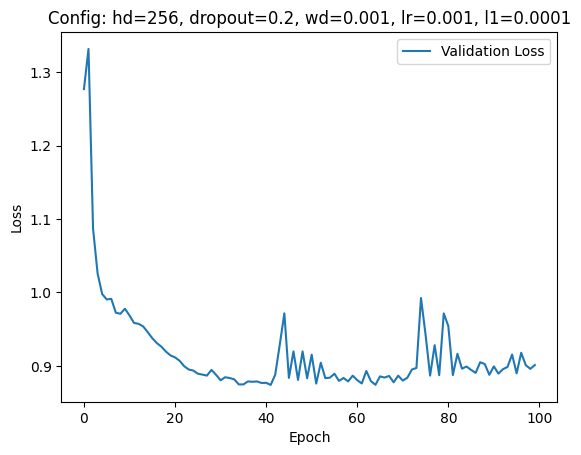

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8850


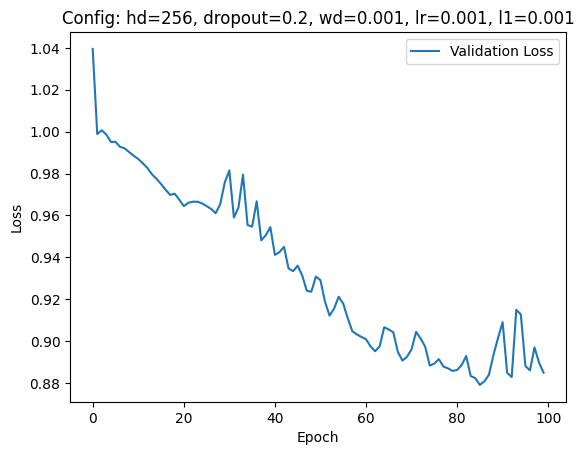

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8902


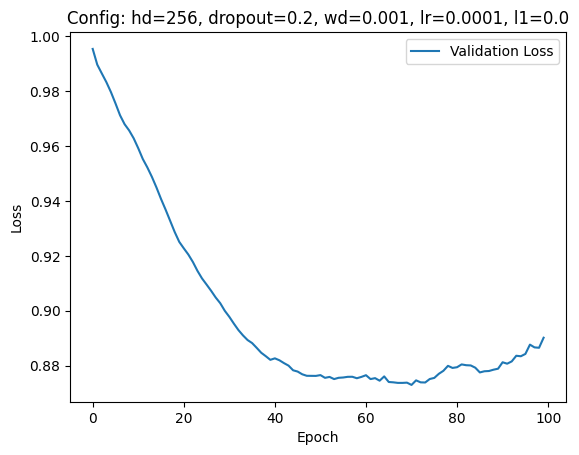

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8794


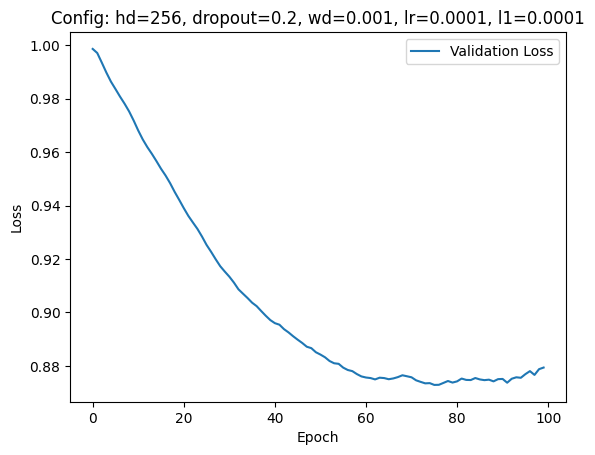

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9510


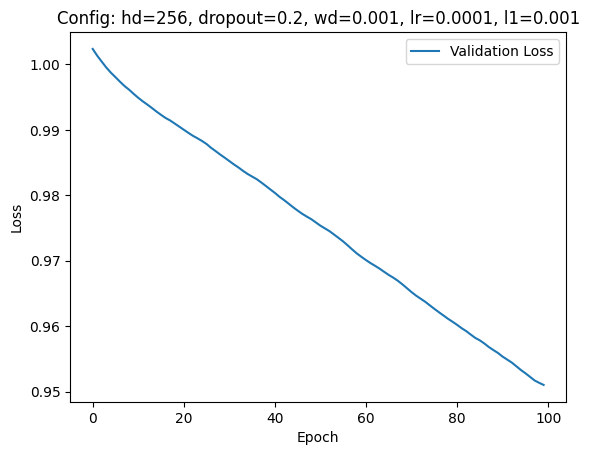

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0042


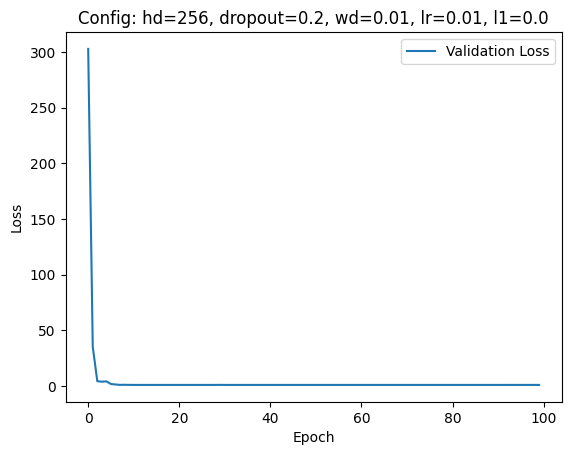

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0008


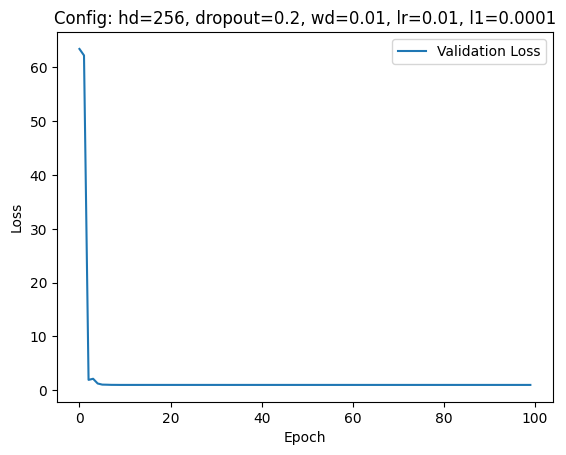

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9993


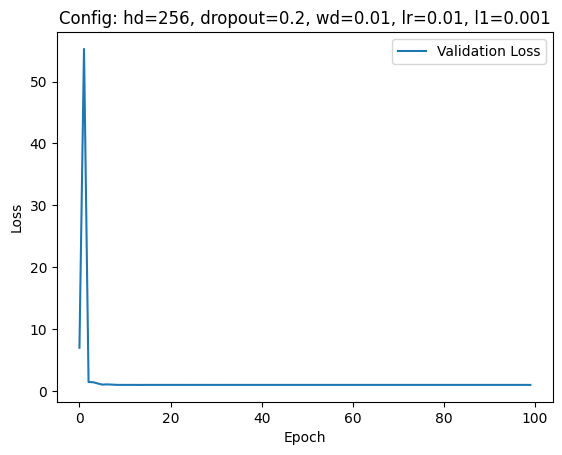

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9957


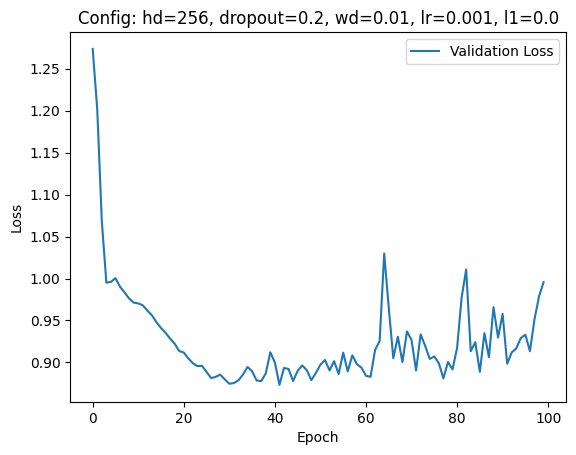

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8853


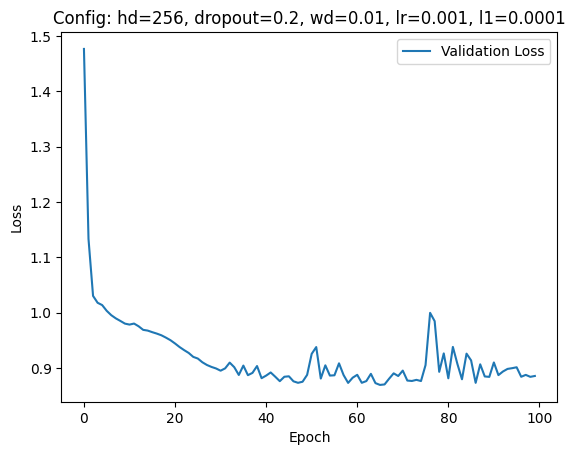

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8834


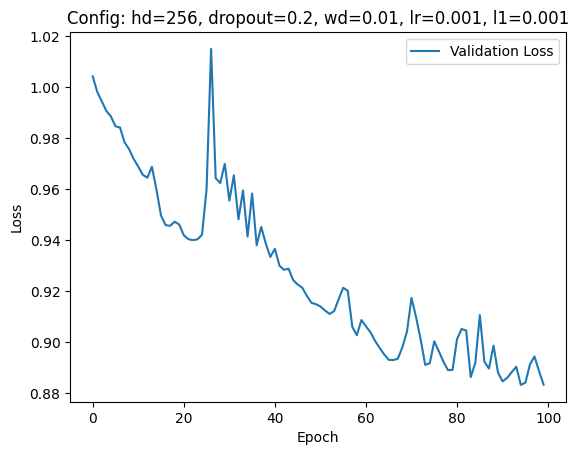

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8901


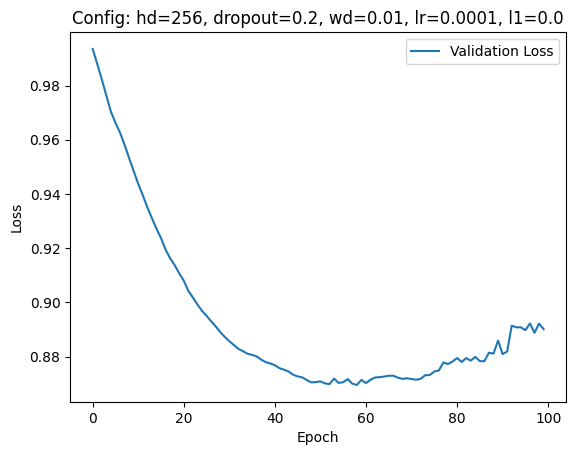

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8702


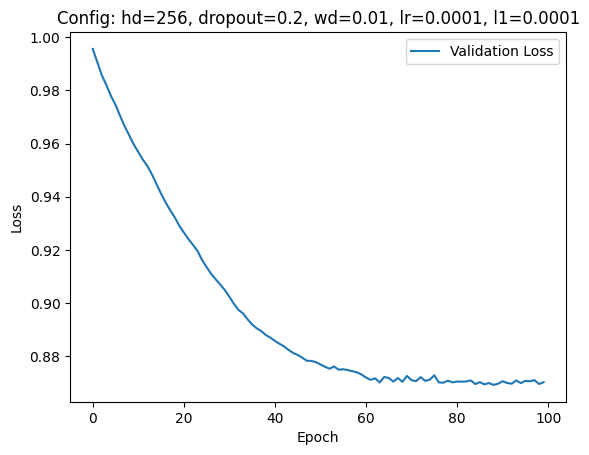

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9375


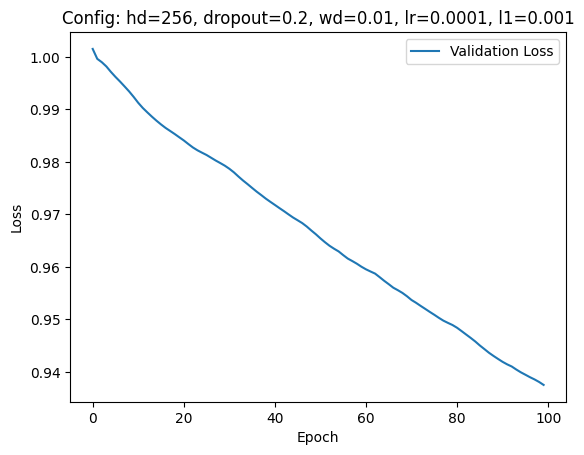

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0002


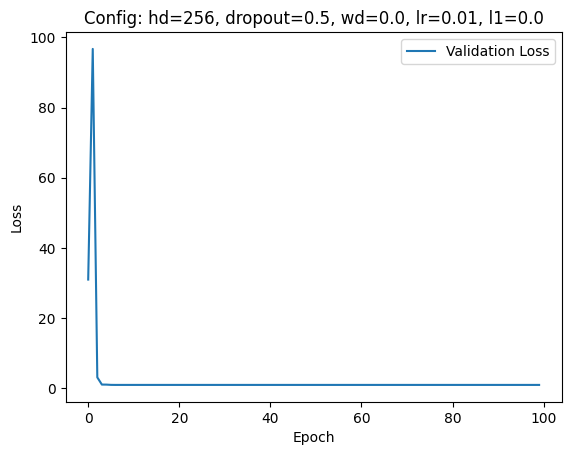

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0002


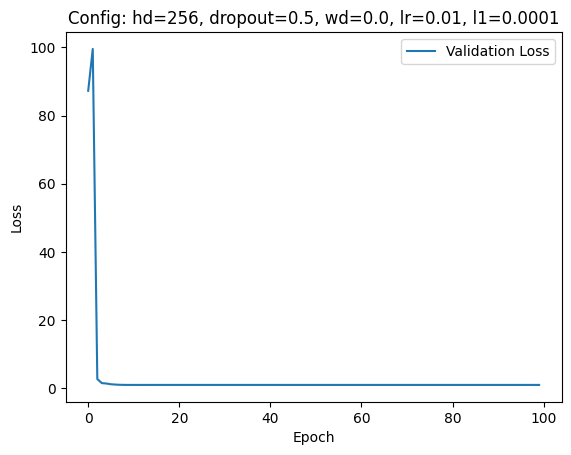

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0000


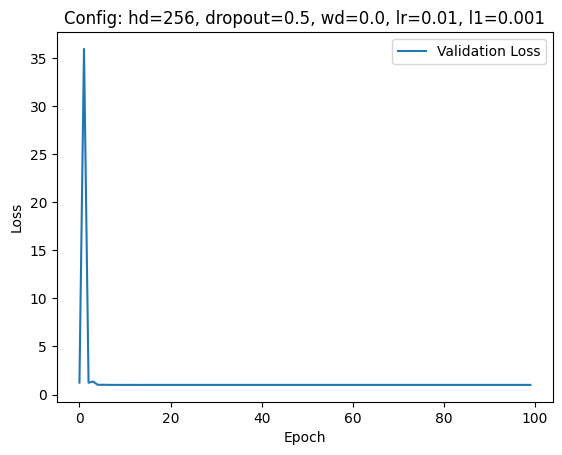

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8834


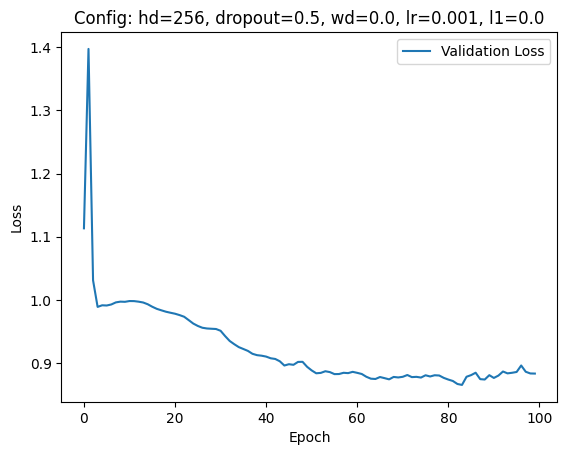

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8697


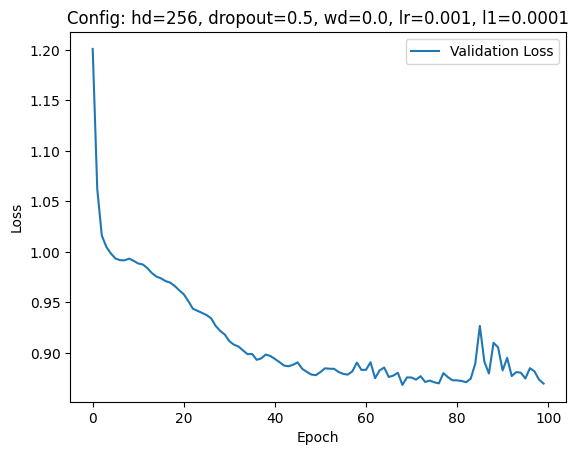

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9112


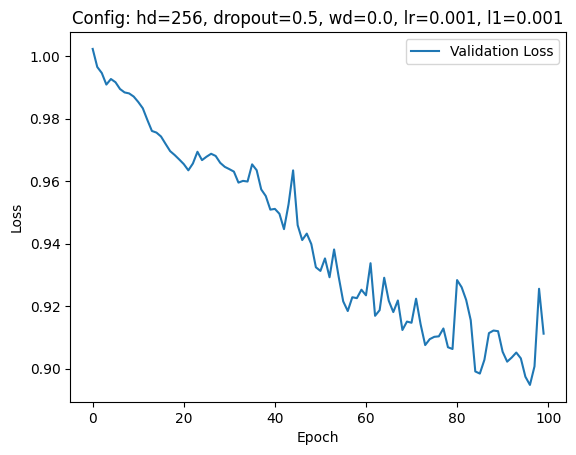

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8747


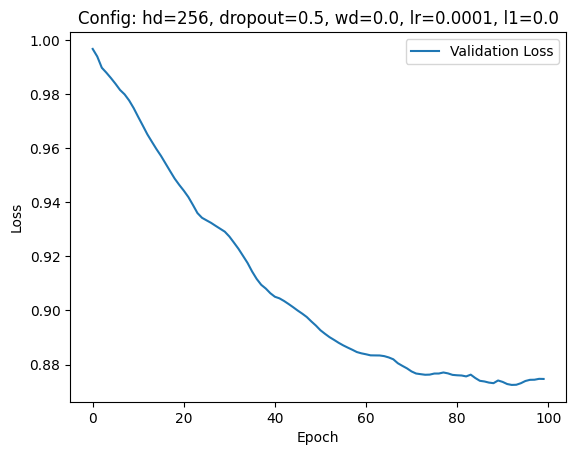

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8749


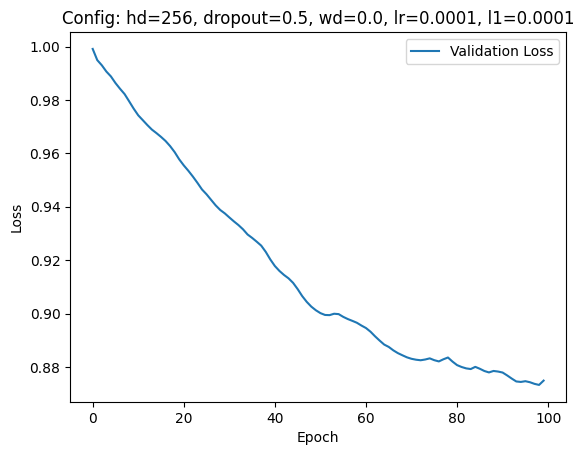

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9536


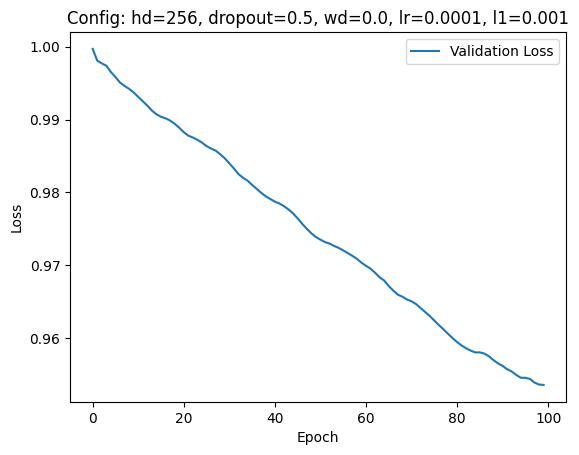

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0005


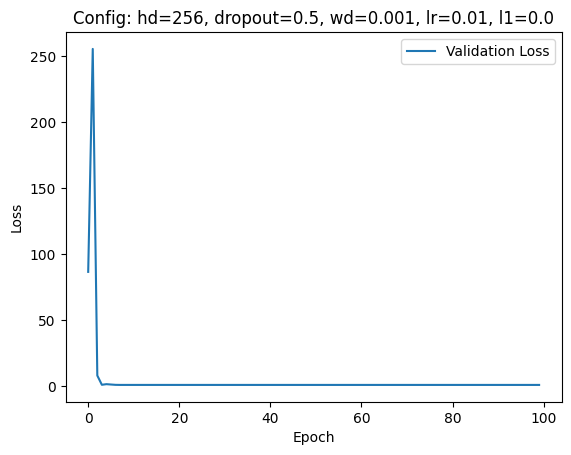

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0010


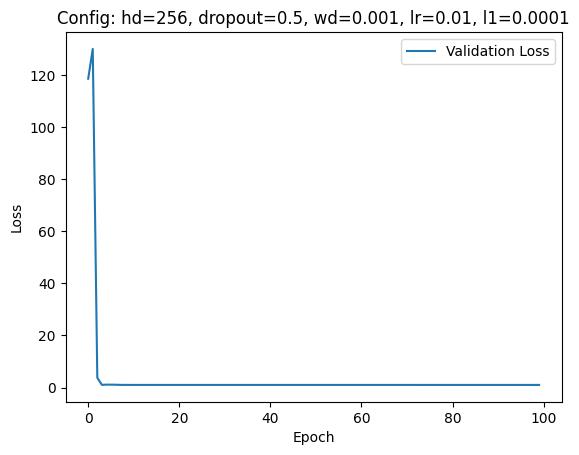

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0002


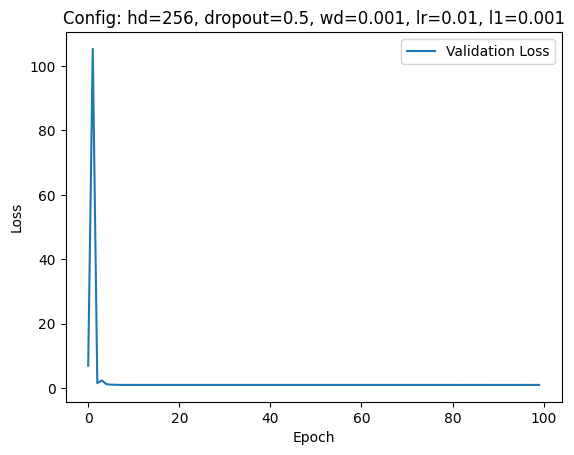

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9117


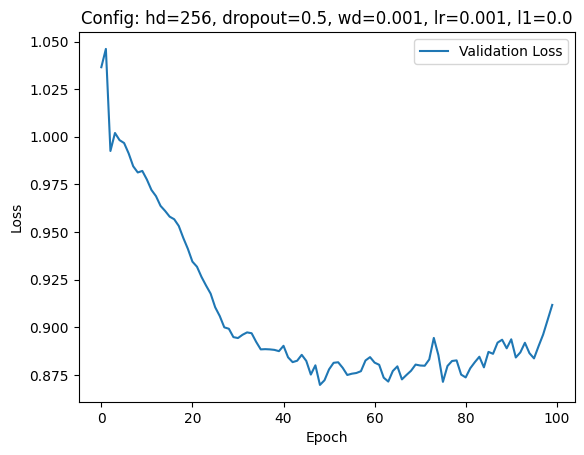

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8873


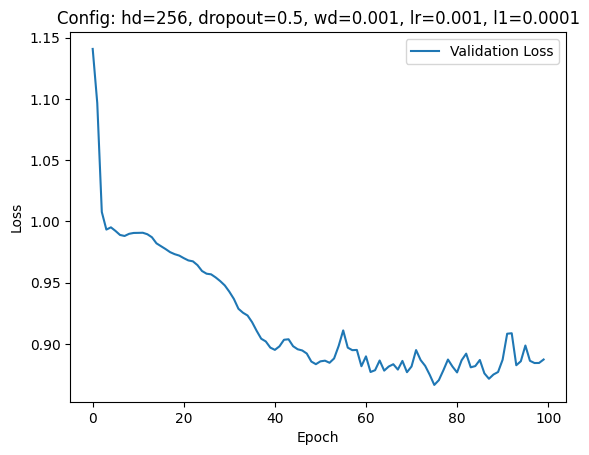

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9151


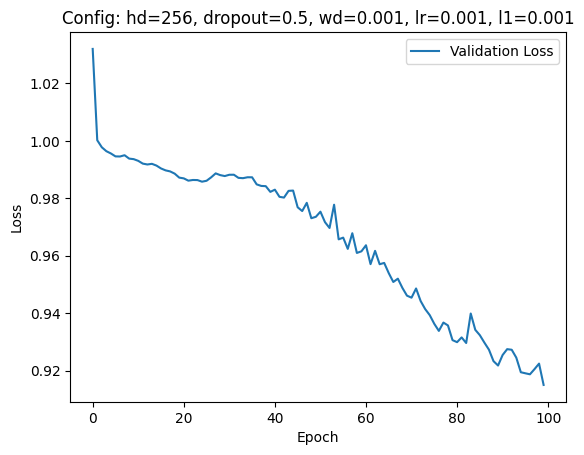

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8718


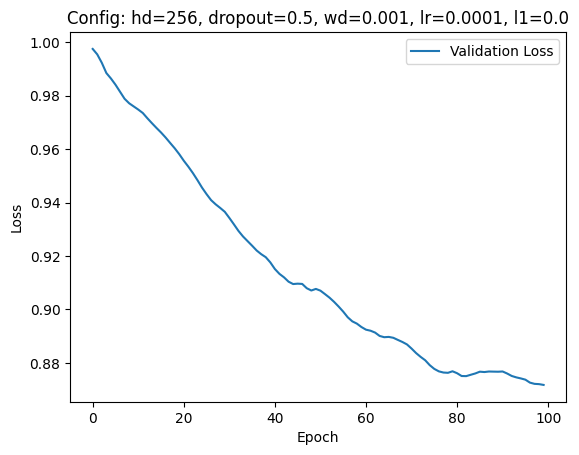

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8820


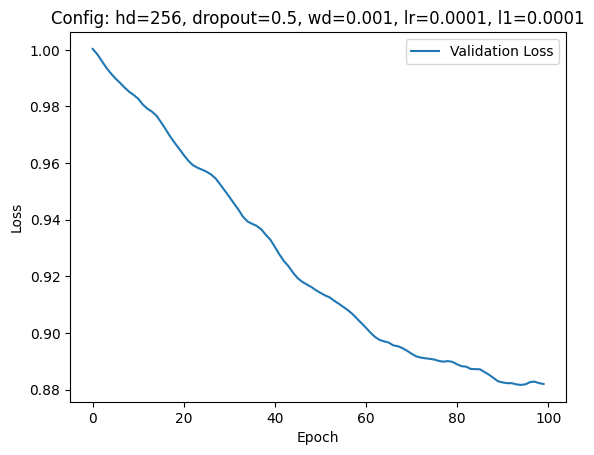

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9630


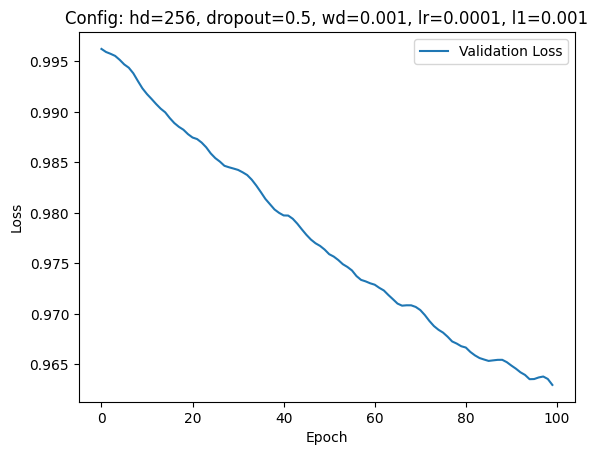

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0046


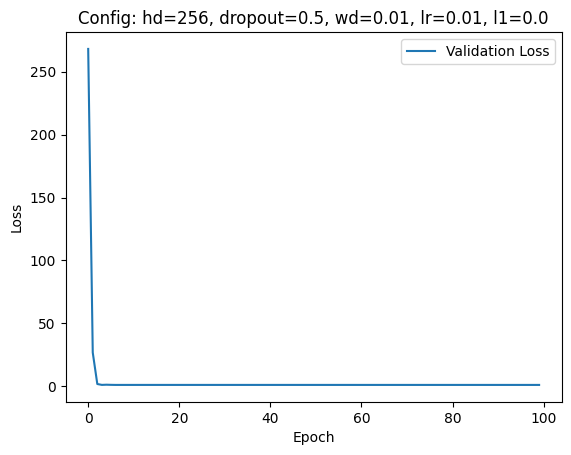

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0025


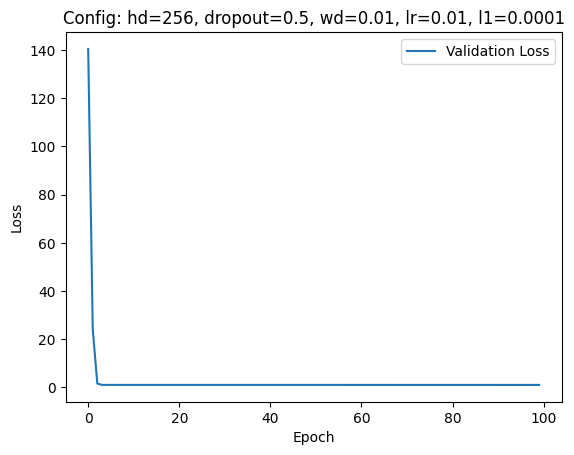

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0001


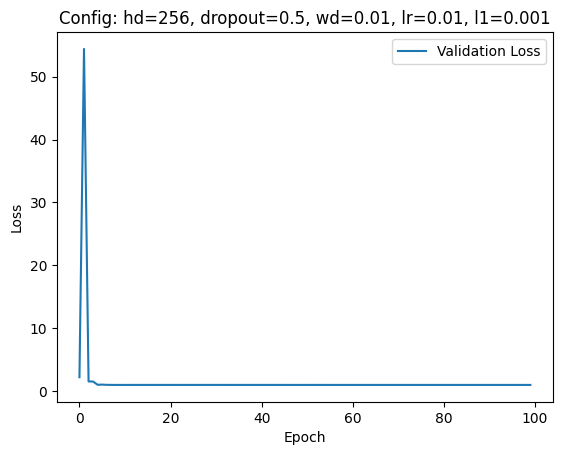

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8832


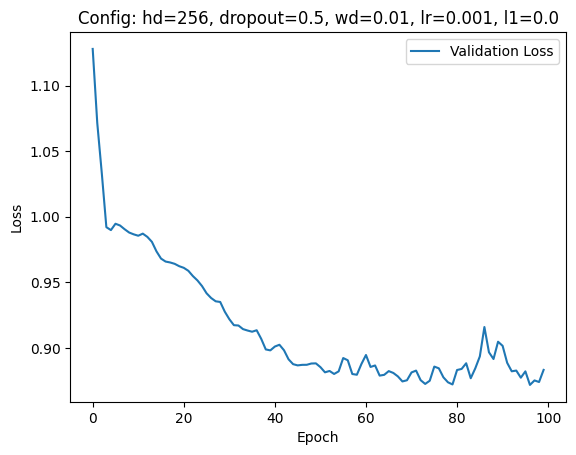

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8902


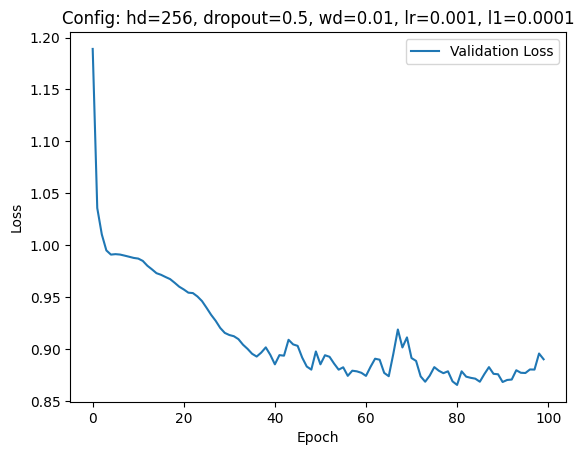

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9545


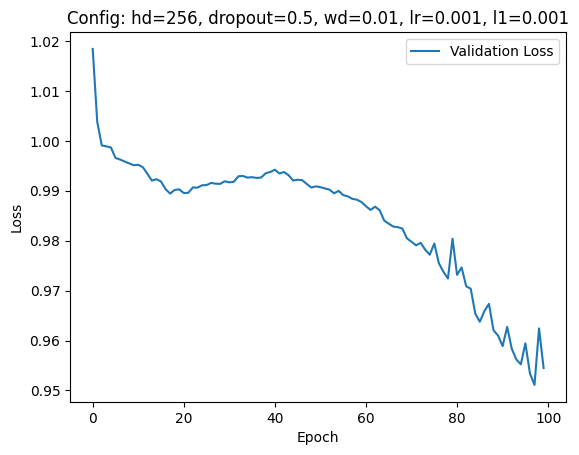

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8697


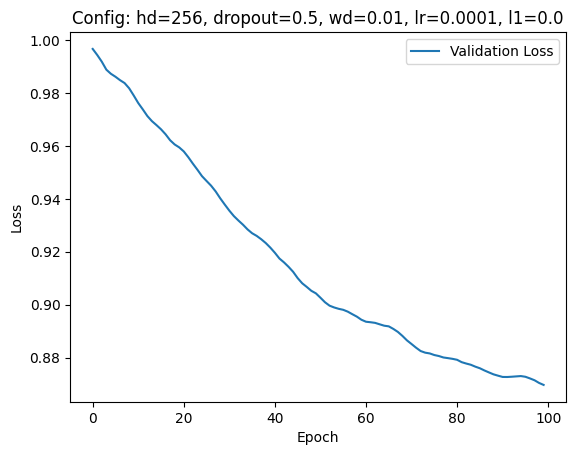

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8774


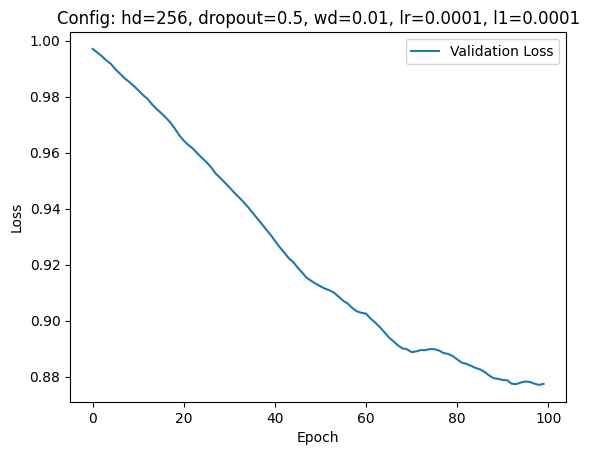

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9789


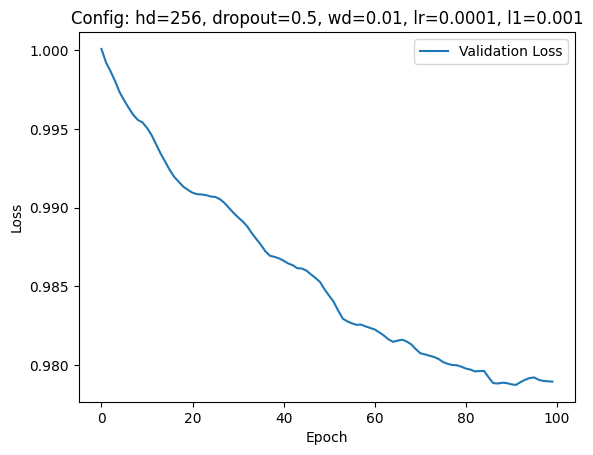

Best Hyperparameters: {'hidden_dim': 64, 'dropout': 0.0, 'weight_decay': 0.0, 'lr': 0.001, 'l1': 0.001}


In [7]:
dummy_model = FFNNModel(input_dim)
best_model, best_params, train_losses, valid_losses = dummy_model.grid_search(
    train_data=(X_train.cpu().numpy(), y_train),
    valid_data=(X_valid.cpu().numpy(), y_valid),
    grid_params=grid_params,
    epochs=epochs,
    device=device
)

print("Best Hyperparameters:", best_params)

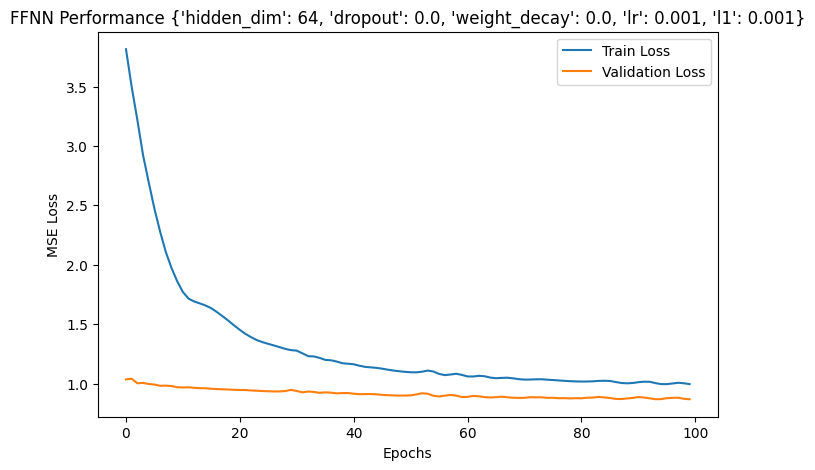

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title(f"FFNN Performance {best_params}")
plt.legend()
plt.savefig("plots/benchmark_1/ffnn_grid_search.pdf")
plt.show()

In [ ]:
test_preds = best_model.evaluate(test_data=(X_test.cpu().numpy(), y_test), device=device)

In [6]:
mse, mae, r2, nll, crps, pearson_corr, spearman_corr = evaluate_model(y_test, test_preds)
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, NLL: {nll:.4f}, CRPS: {crps:.4f}, Pearson: {pearson_corr:.4f}, Spearman: {spearman_corr:.4f}")

MSE: 0.8763, MAE: 0.7284, R2: 0.1237, NLL: 1.3529, CRPS: 0.7284, Pearson: 0.3497, Spearman: 0.3543


In [11]:
best_model.save(save_path)

INFO:models.ffnn:Model saved to baseline_weights/benchmark_1/ffnn.pth
